In [67]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from plot_days_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort2")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
# ANIMALS
ANIMAL_IDS = [
    "R020",
    "R021",
    "R022",
    "R023",
    "R024",
    "R025",
    "R026",
    "R027",
    "R028",
    "R029",
]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [69]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
)

[2024-05-07 18:51:41,410][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 18 sessions for R020 between 2024-04-17 and 2024-05-06
fetched 19 sessions for R021 between 2024-04-17 and 2024-05-07
Not all variables are the same length. Cannot create proper DataFrame
result: 2
hits: 2
violations: 2
temperror: 2
hit_rate: 1
error_rate: 1
violation_rate: 1
temp_error_rate: 1
n_lpokes: 1
n_cpokes: 1
n_rpokes: 1
trial_dur: 1
trial_start: 1
valid_early_spoke: 1
first_spoke: 1
first_lpoke: 1
first_rpoke: 1
n_settling_ins: 1
avg_settling_in: 1
cpoke_dur: 1
n_incorr_spokes_during_give_del: 1
stage: 1
curriculum: 1
sides: 2
SMA_set: 1
is_match: 2
sa: 1
sb: 1
stimuli_on: 1
settling_in_dur: 1
legal_cbreak_dur: 1
pre_dur: 1
adj_pre_dur: 1
stimulus_dur: 1
delay_dur: 1
post_dur: 1
sb_extra_dur: 1
viol_off_dur: 1
pre_go_dur: 1
inter_trial_dur: 1
go_type: 1
go_dur: 1
give_type_set: 1
give_type_imp: 1
give_frac: 1
give_delay_dur: 1
give_xtra_light_delay_dur: 1
give_use: 2
give_del_growth_type: 1
give_del_adagrow_trial_subset: 1
give_del_adagrow_alpha_plus: 1
give_del_adagr

In [70]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )
f_name = "R02s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2024-04-17 -> 2024-05-06
Returning appended df with entries between 2024-04-17 and 2024-05-07
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/R02s_days_df.csv


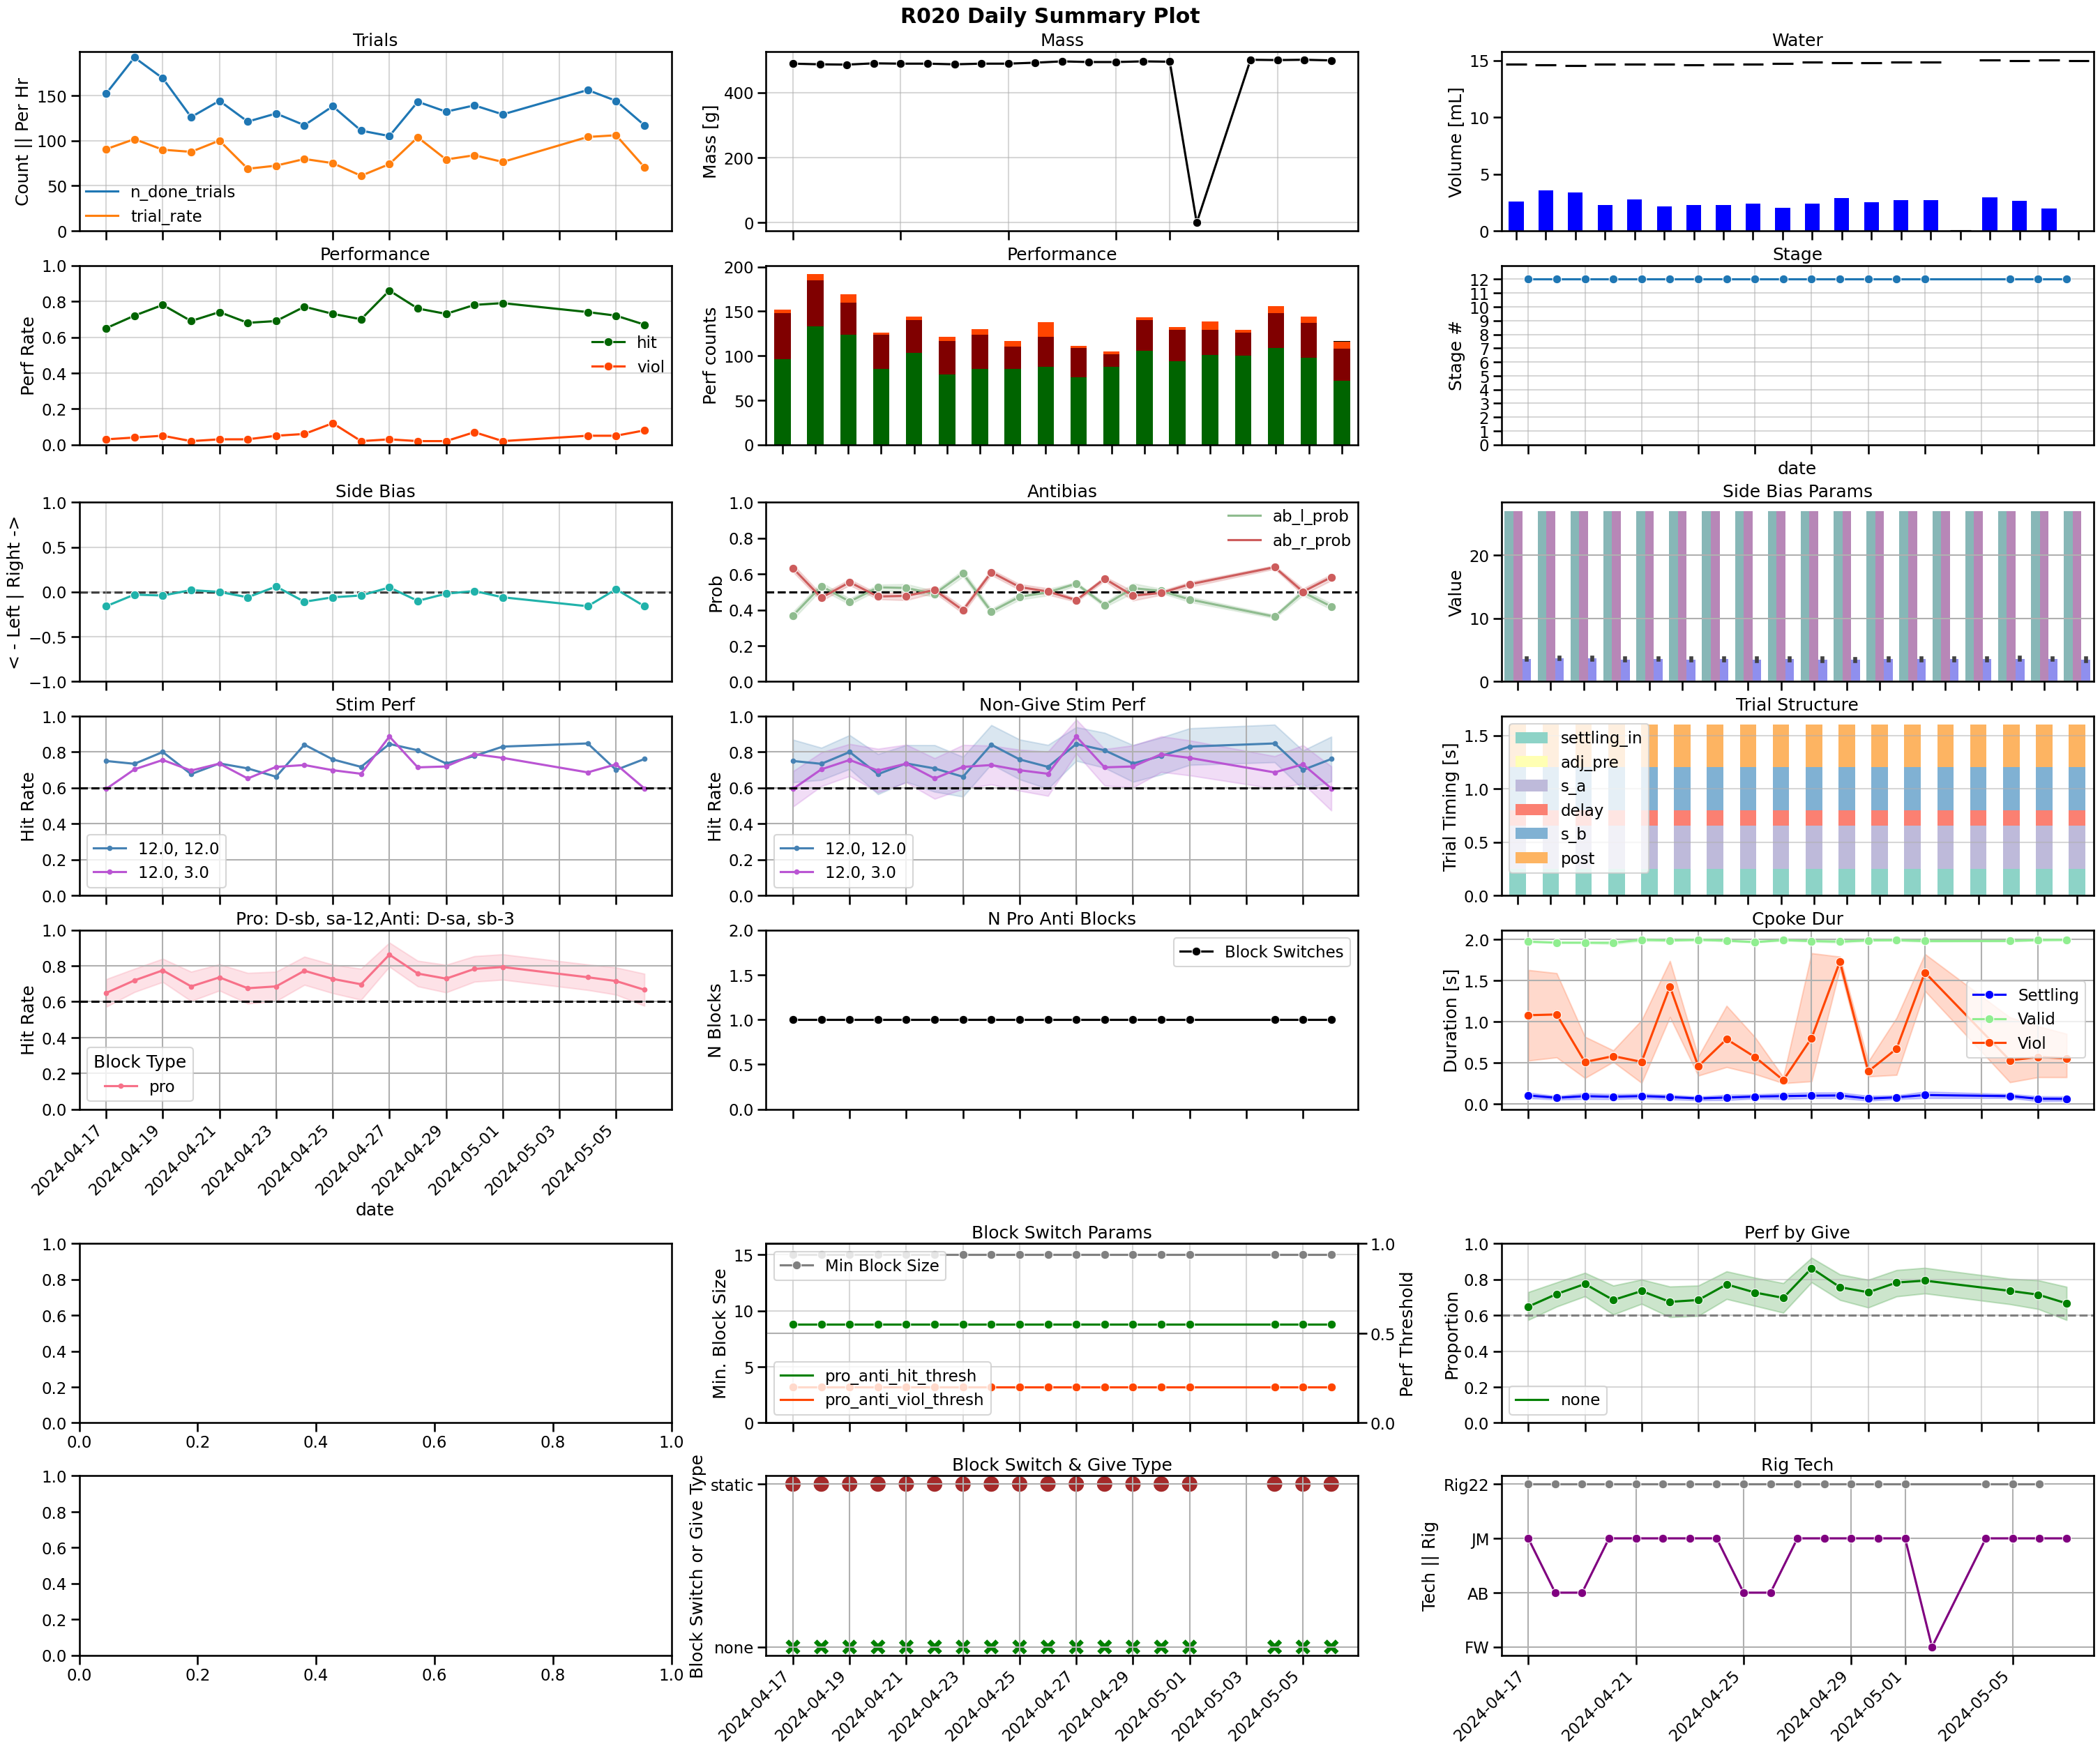

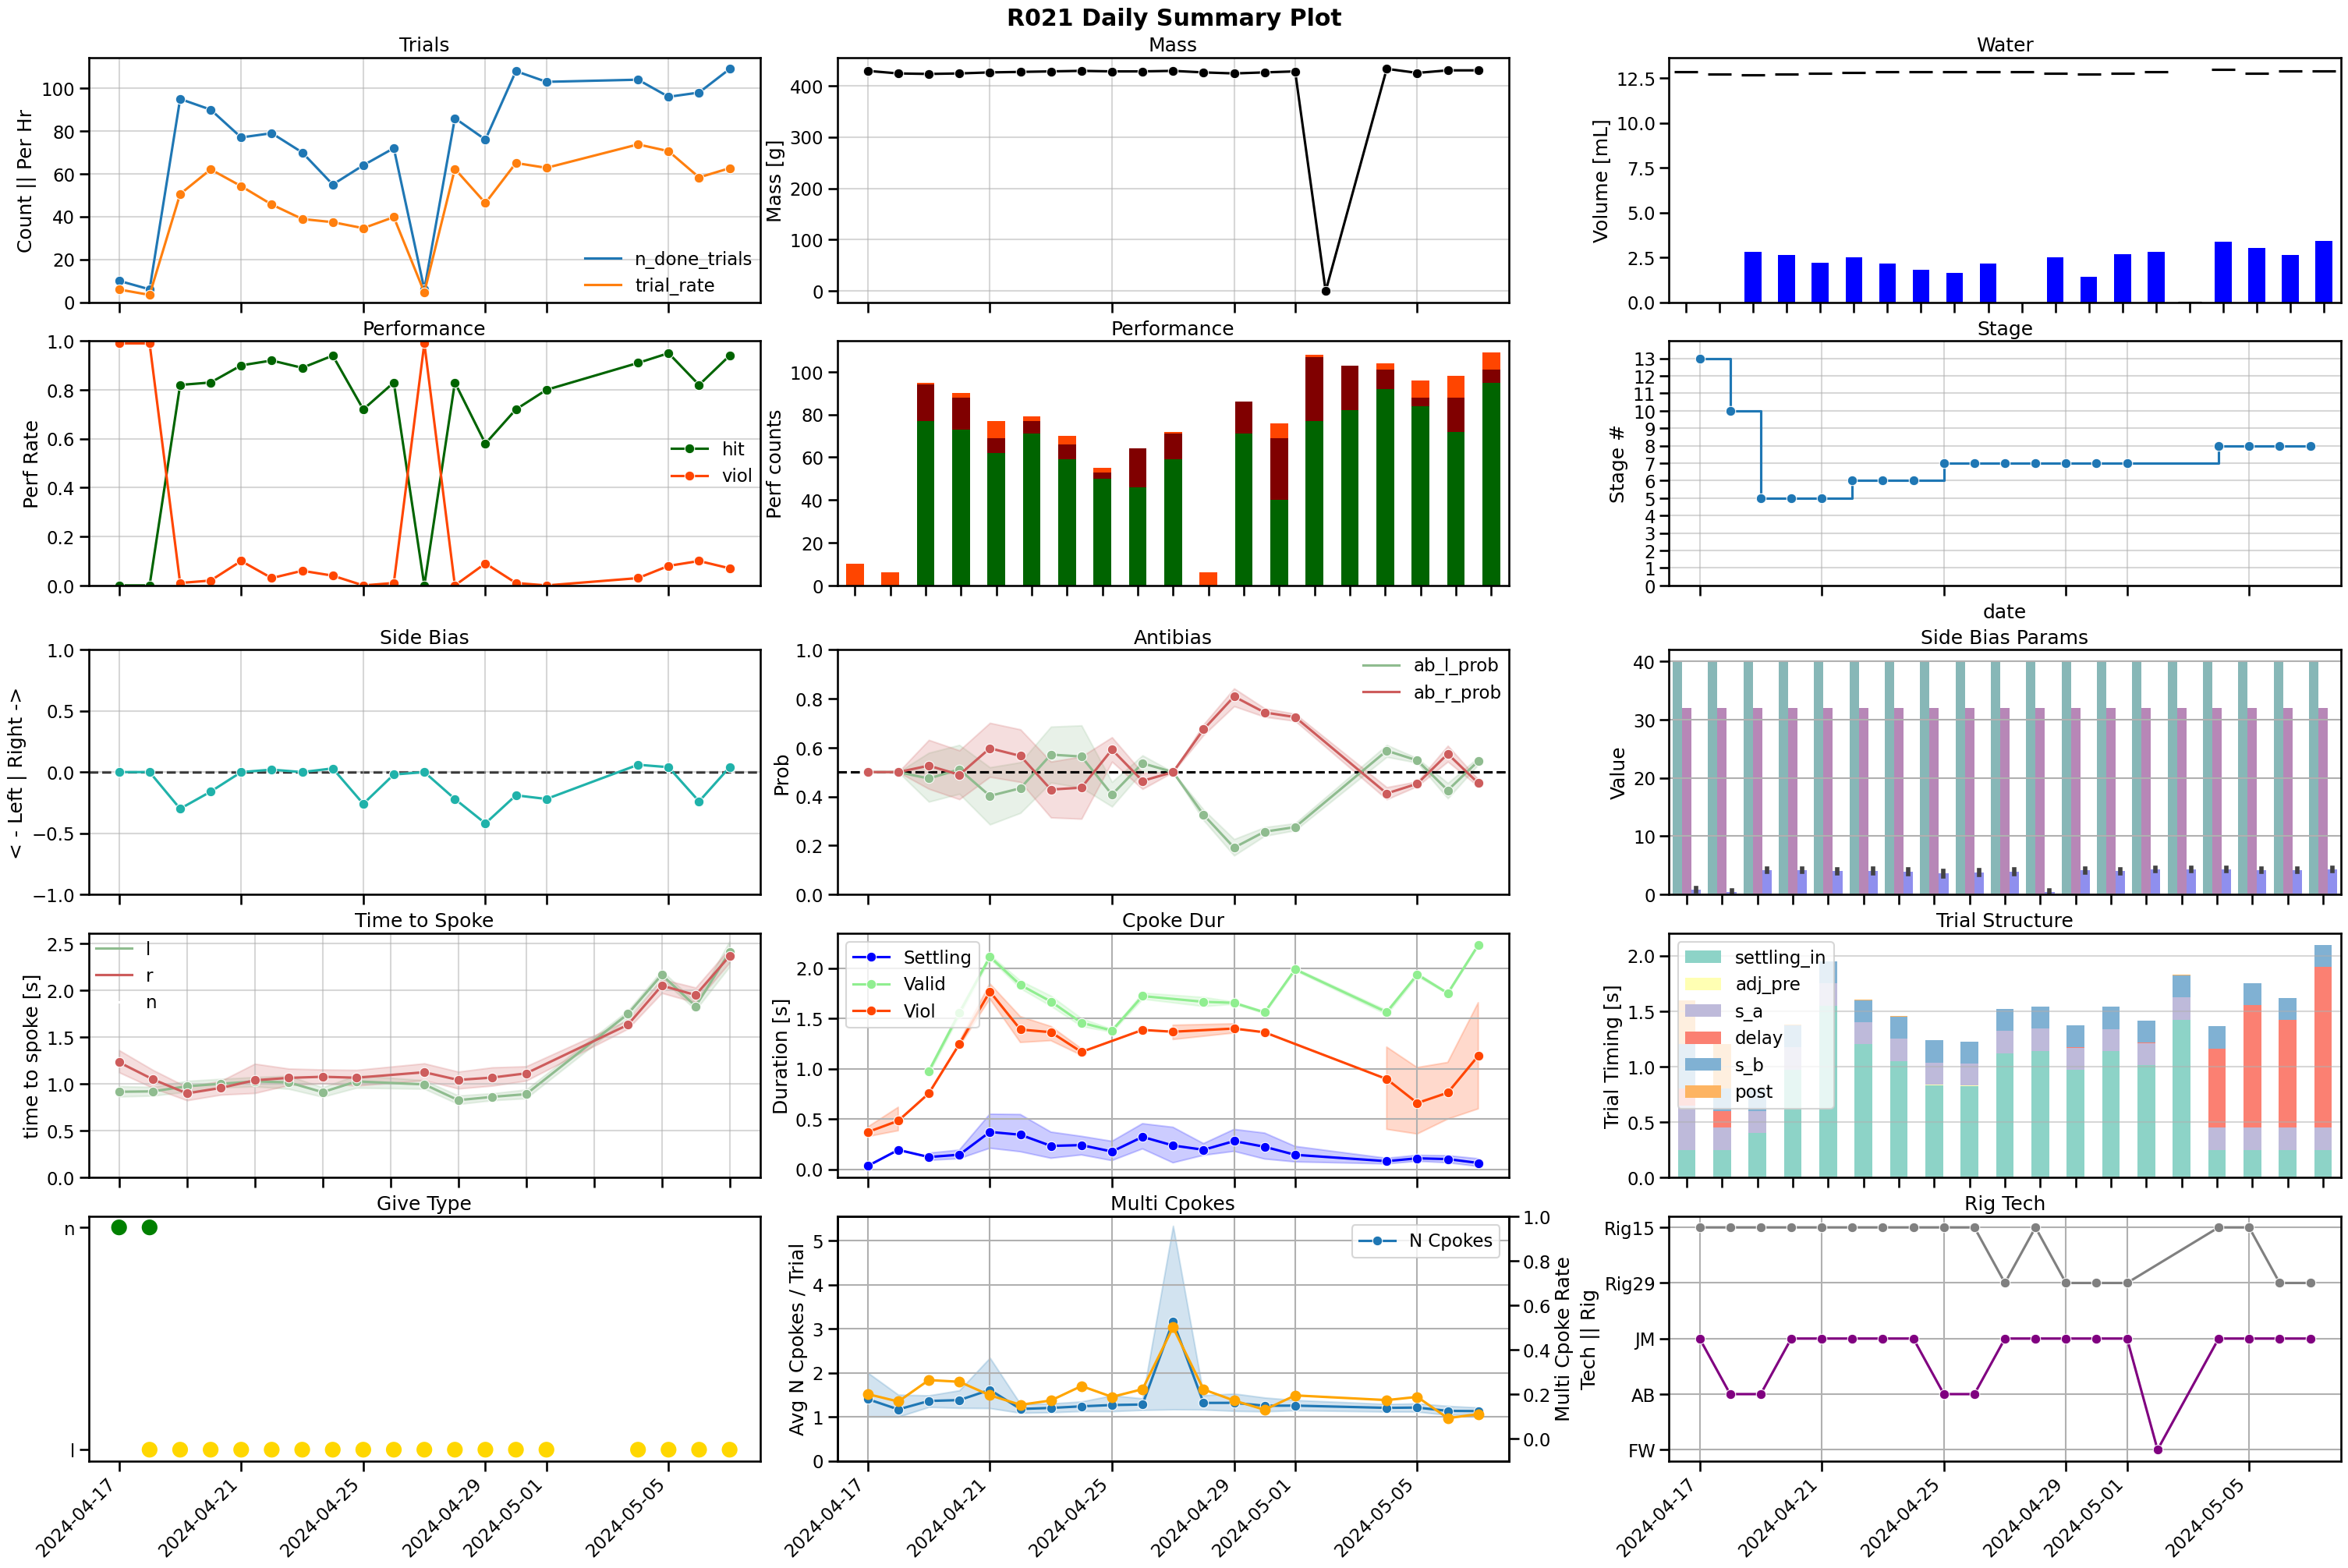

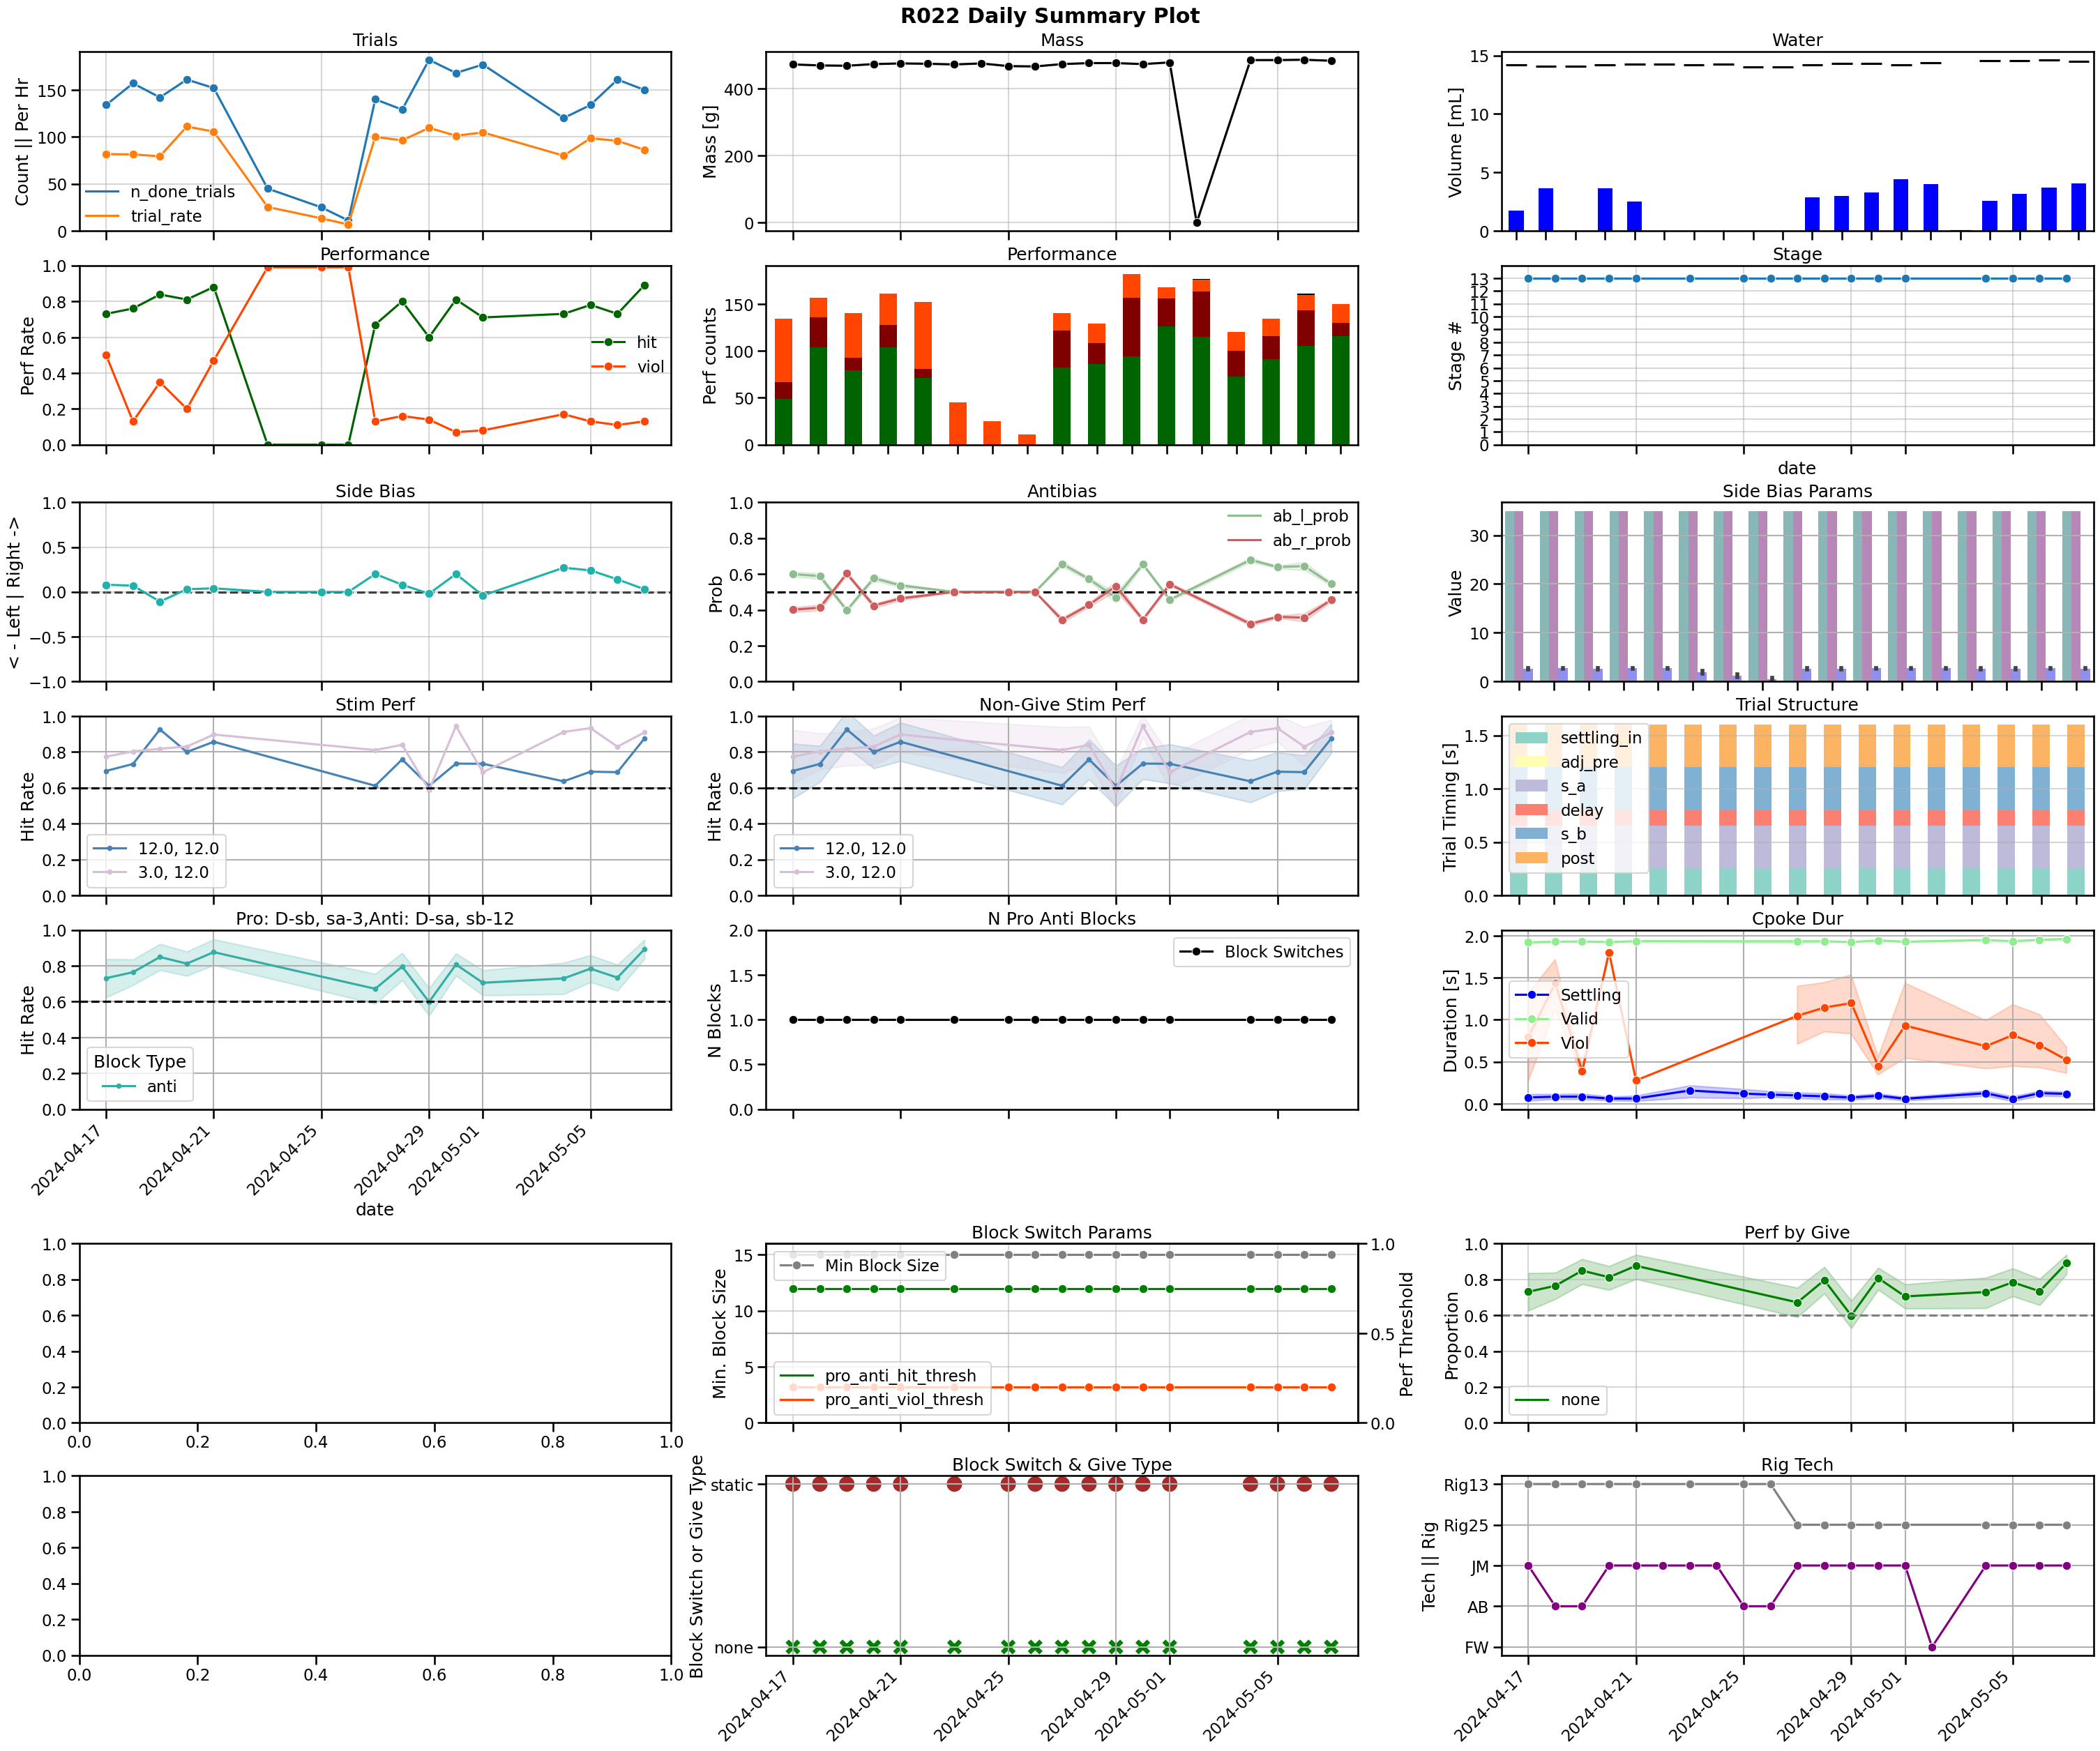

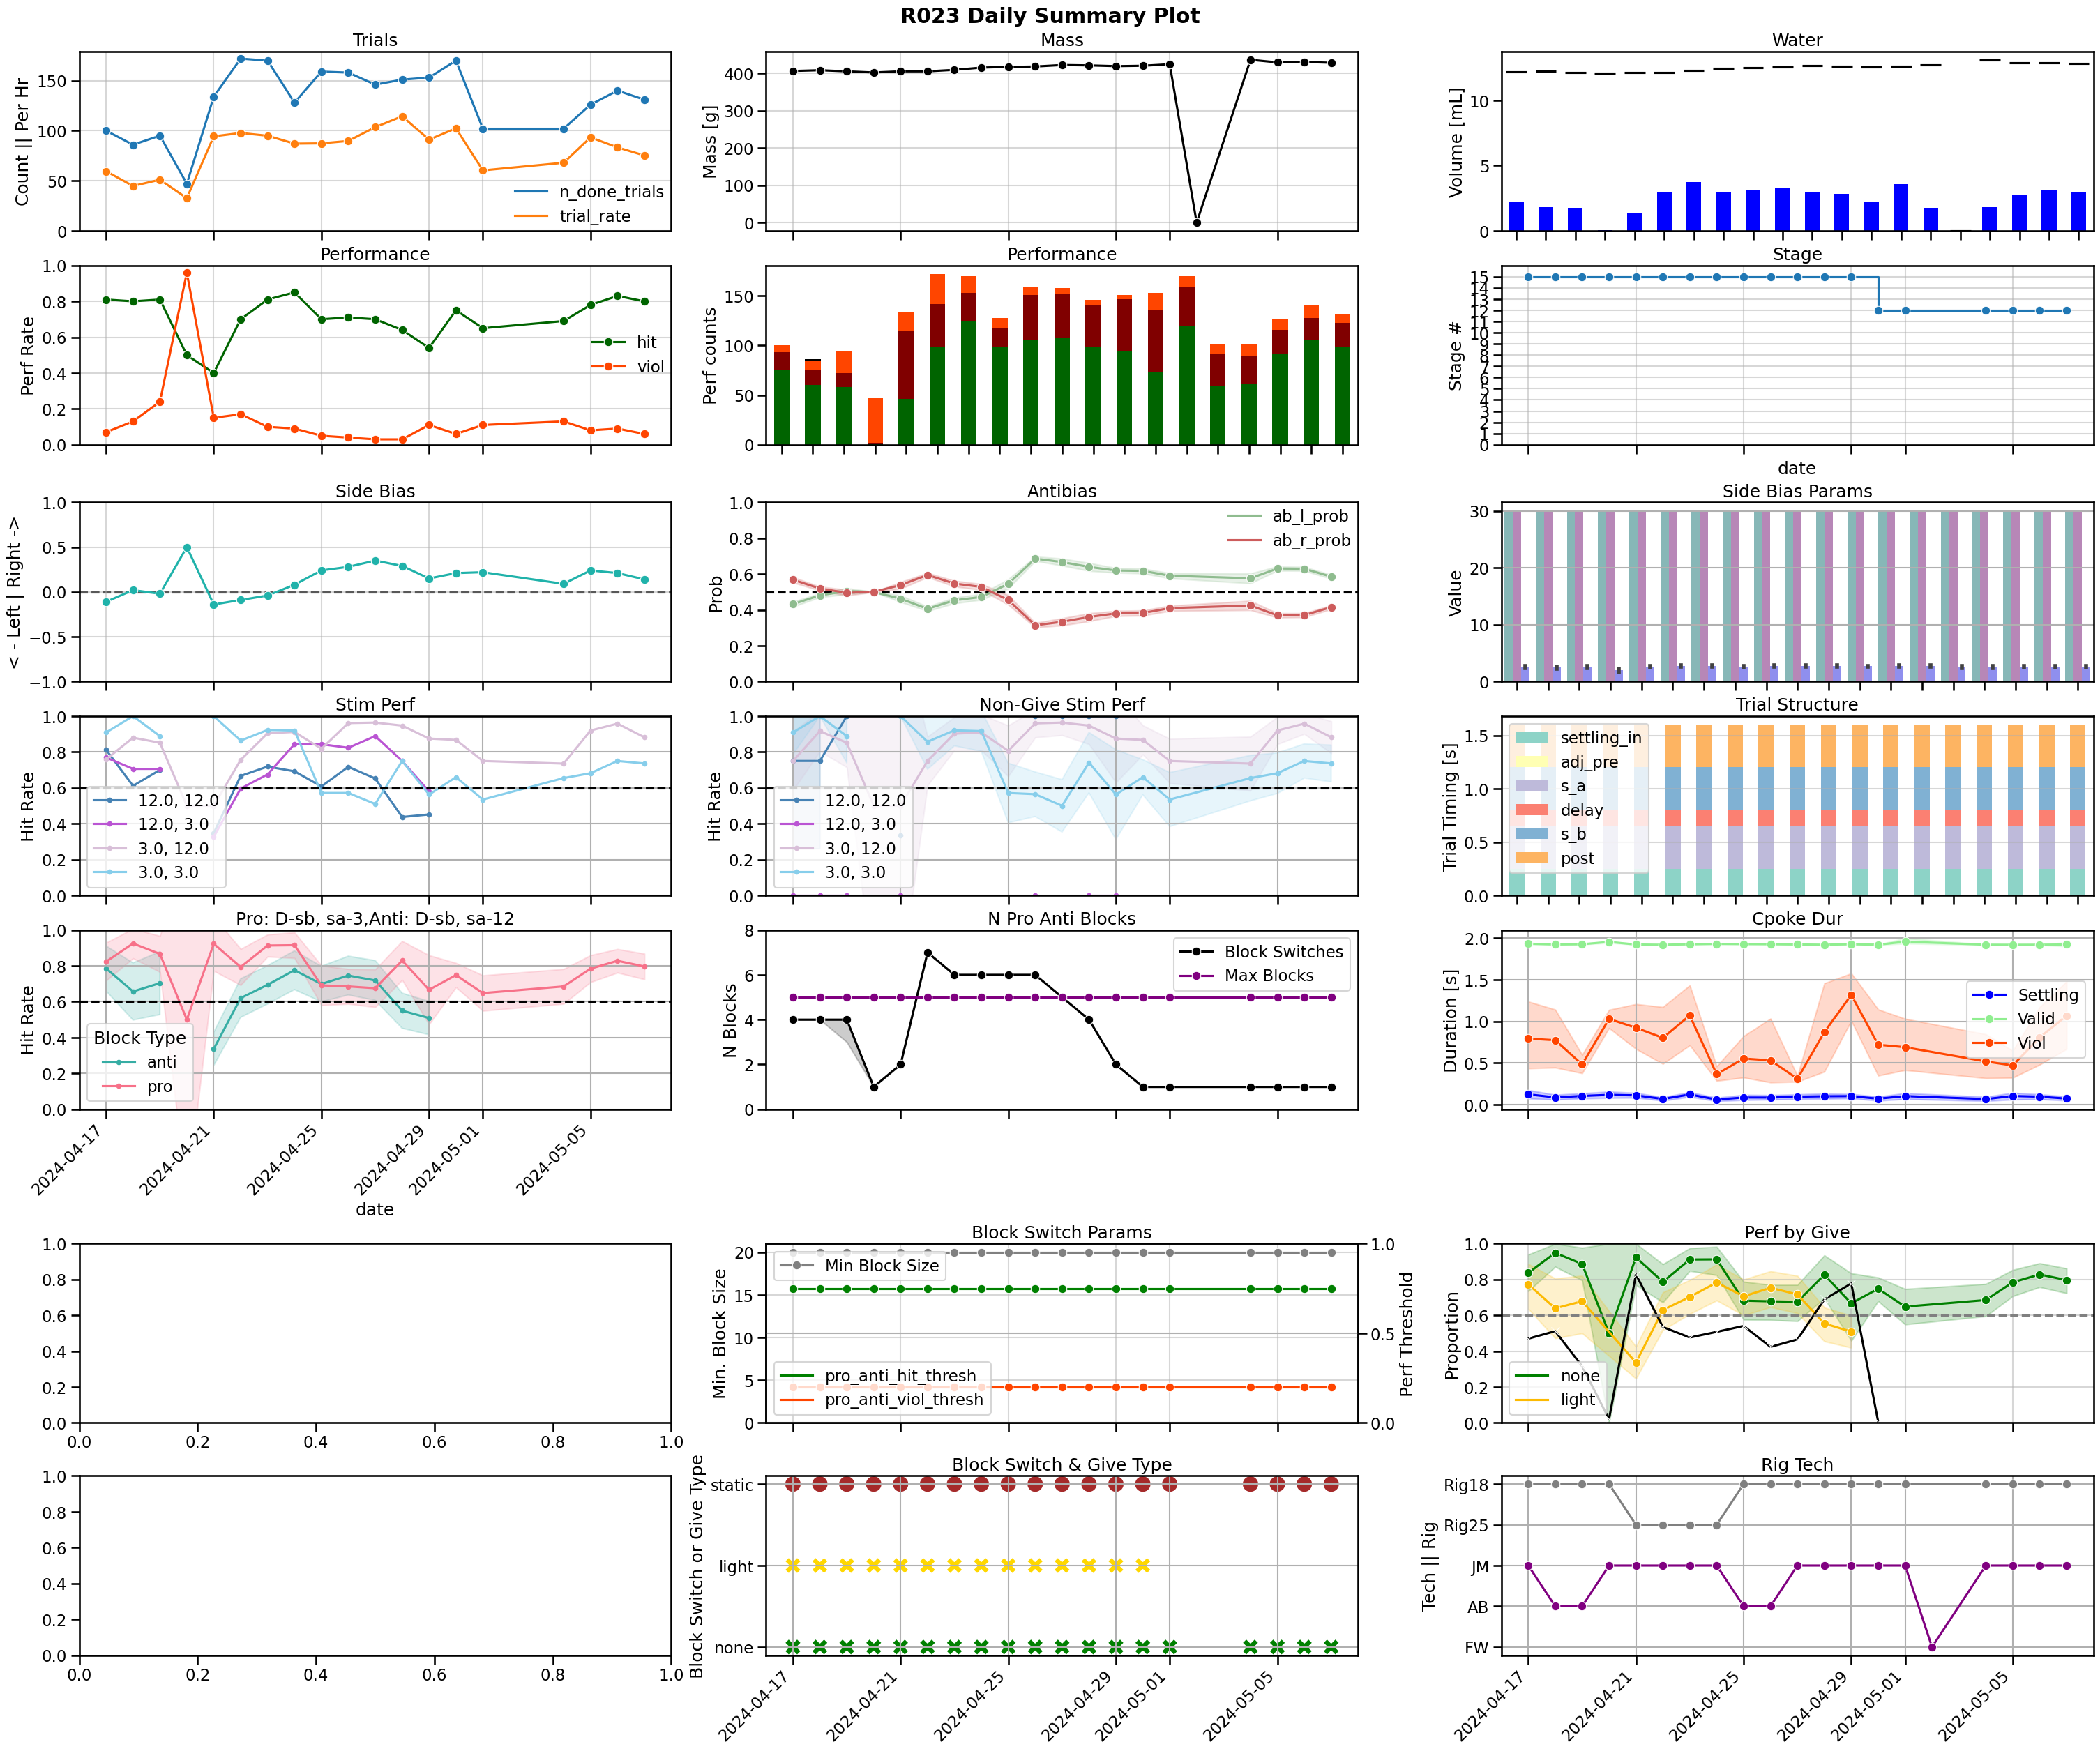

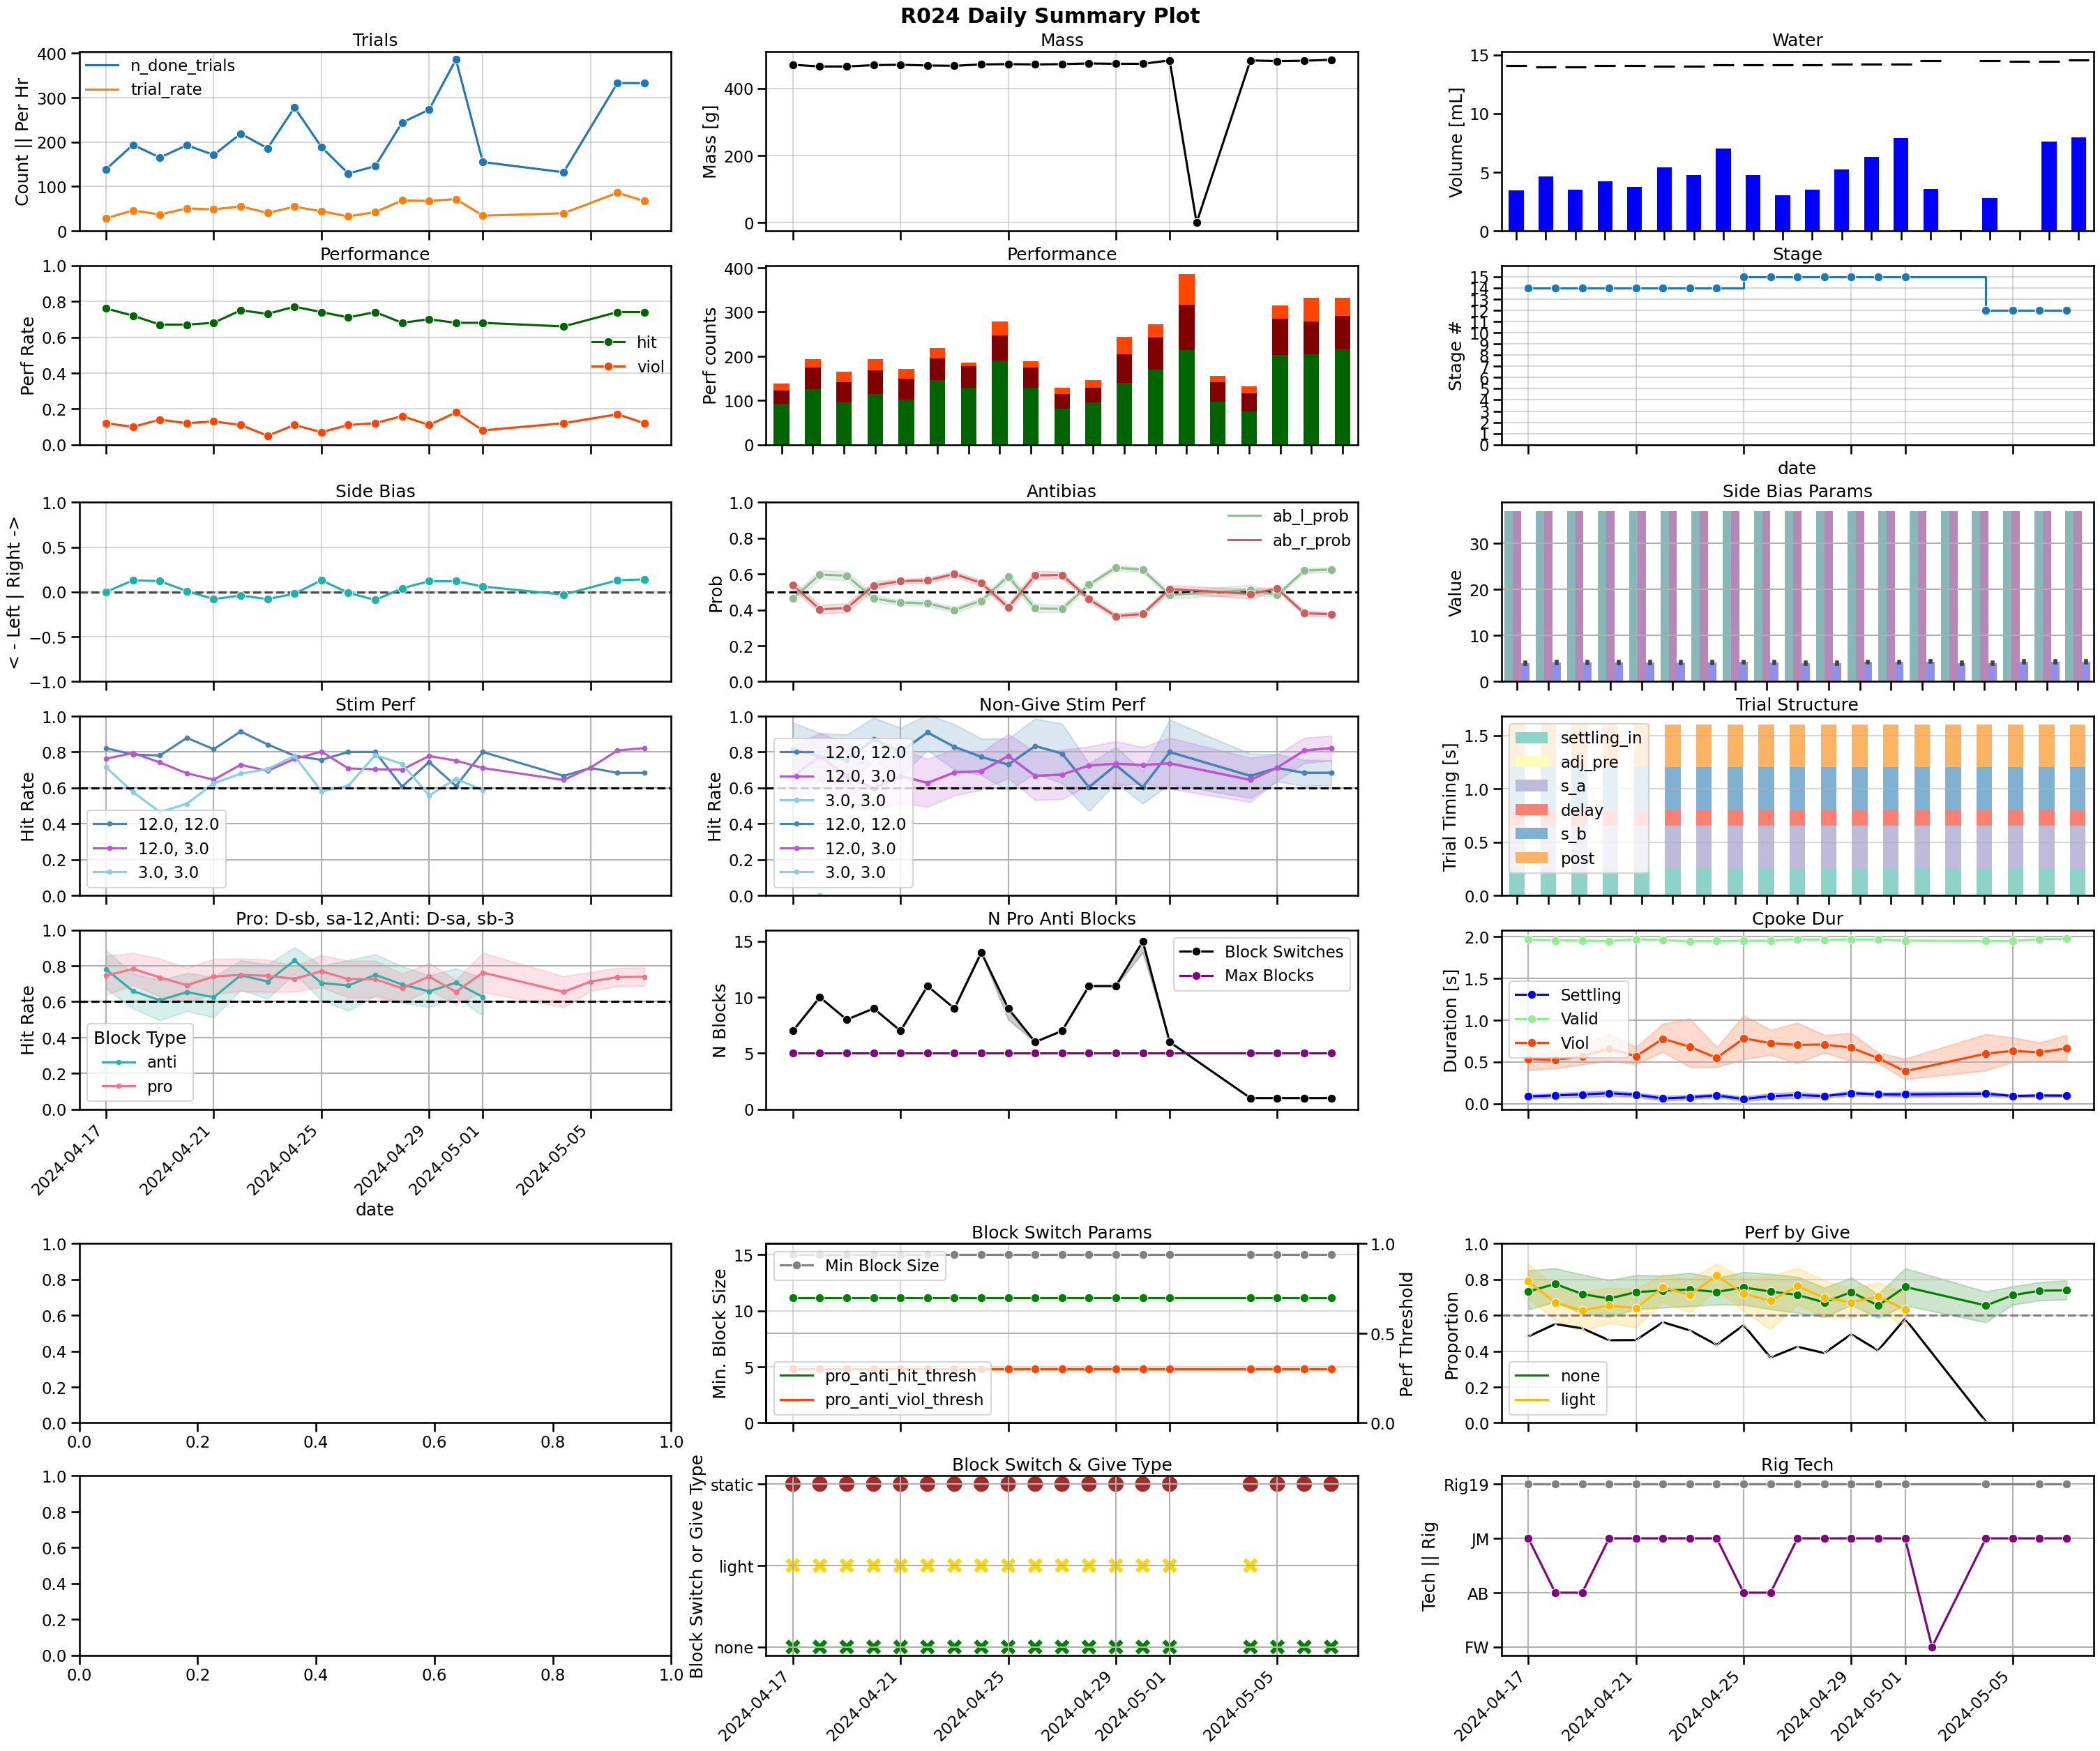

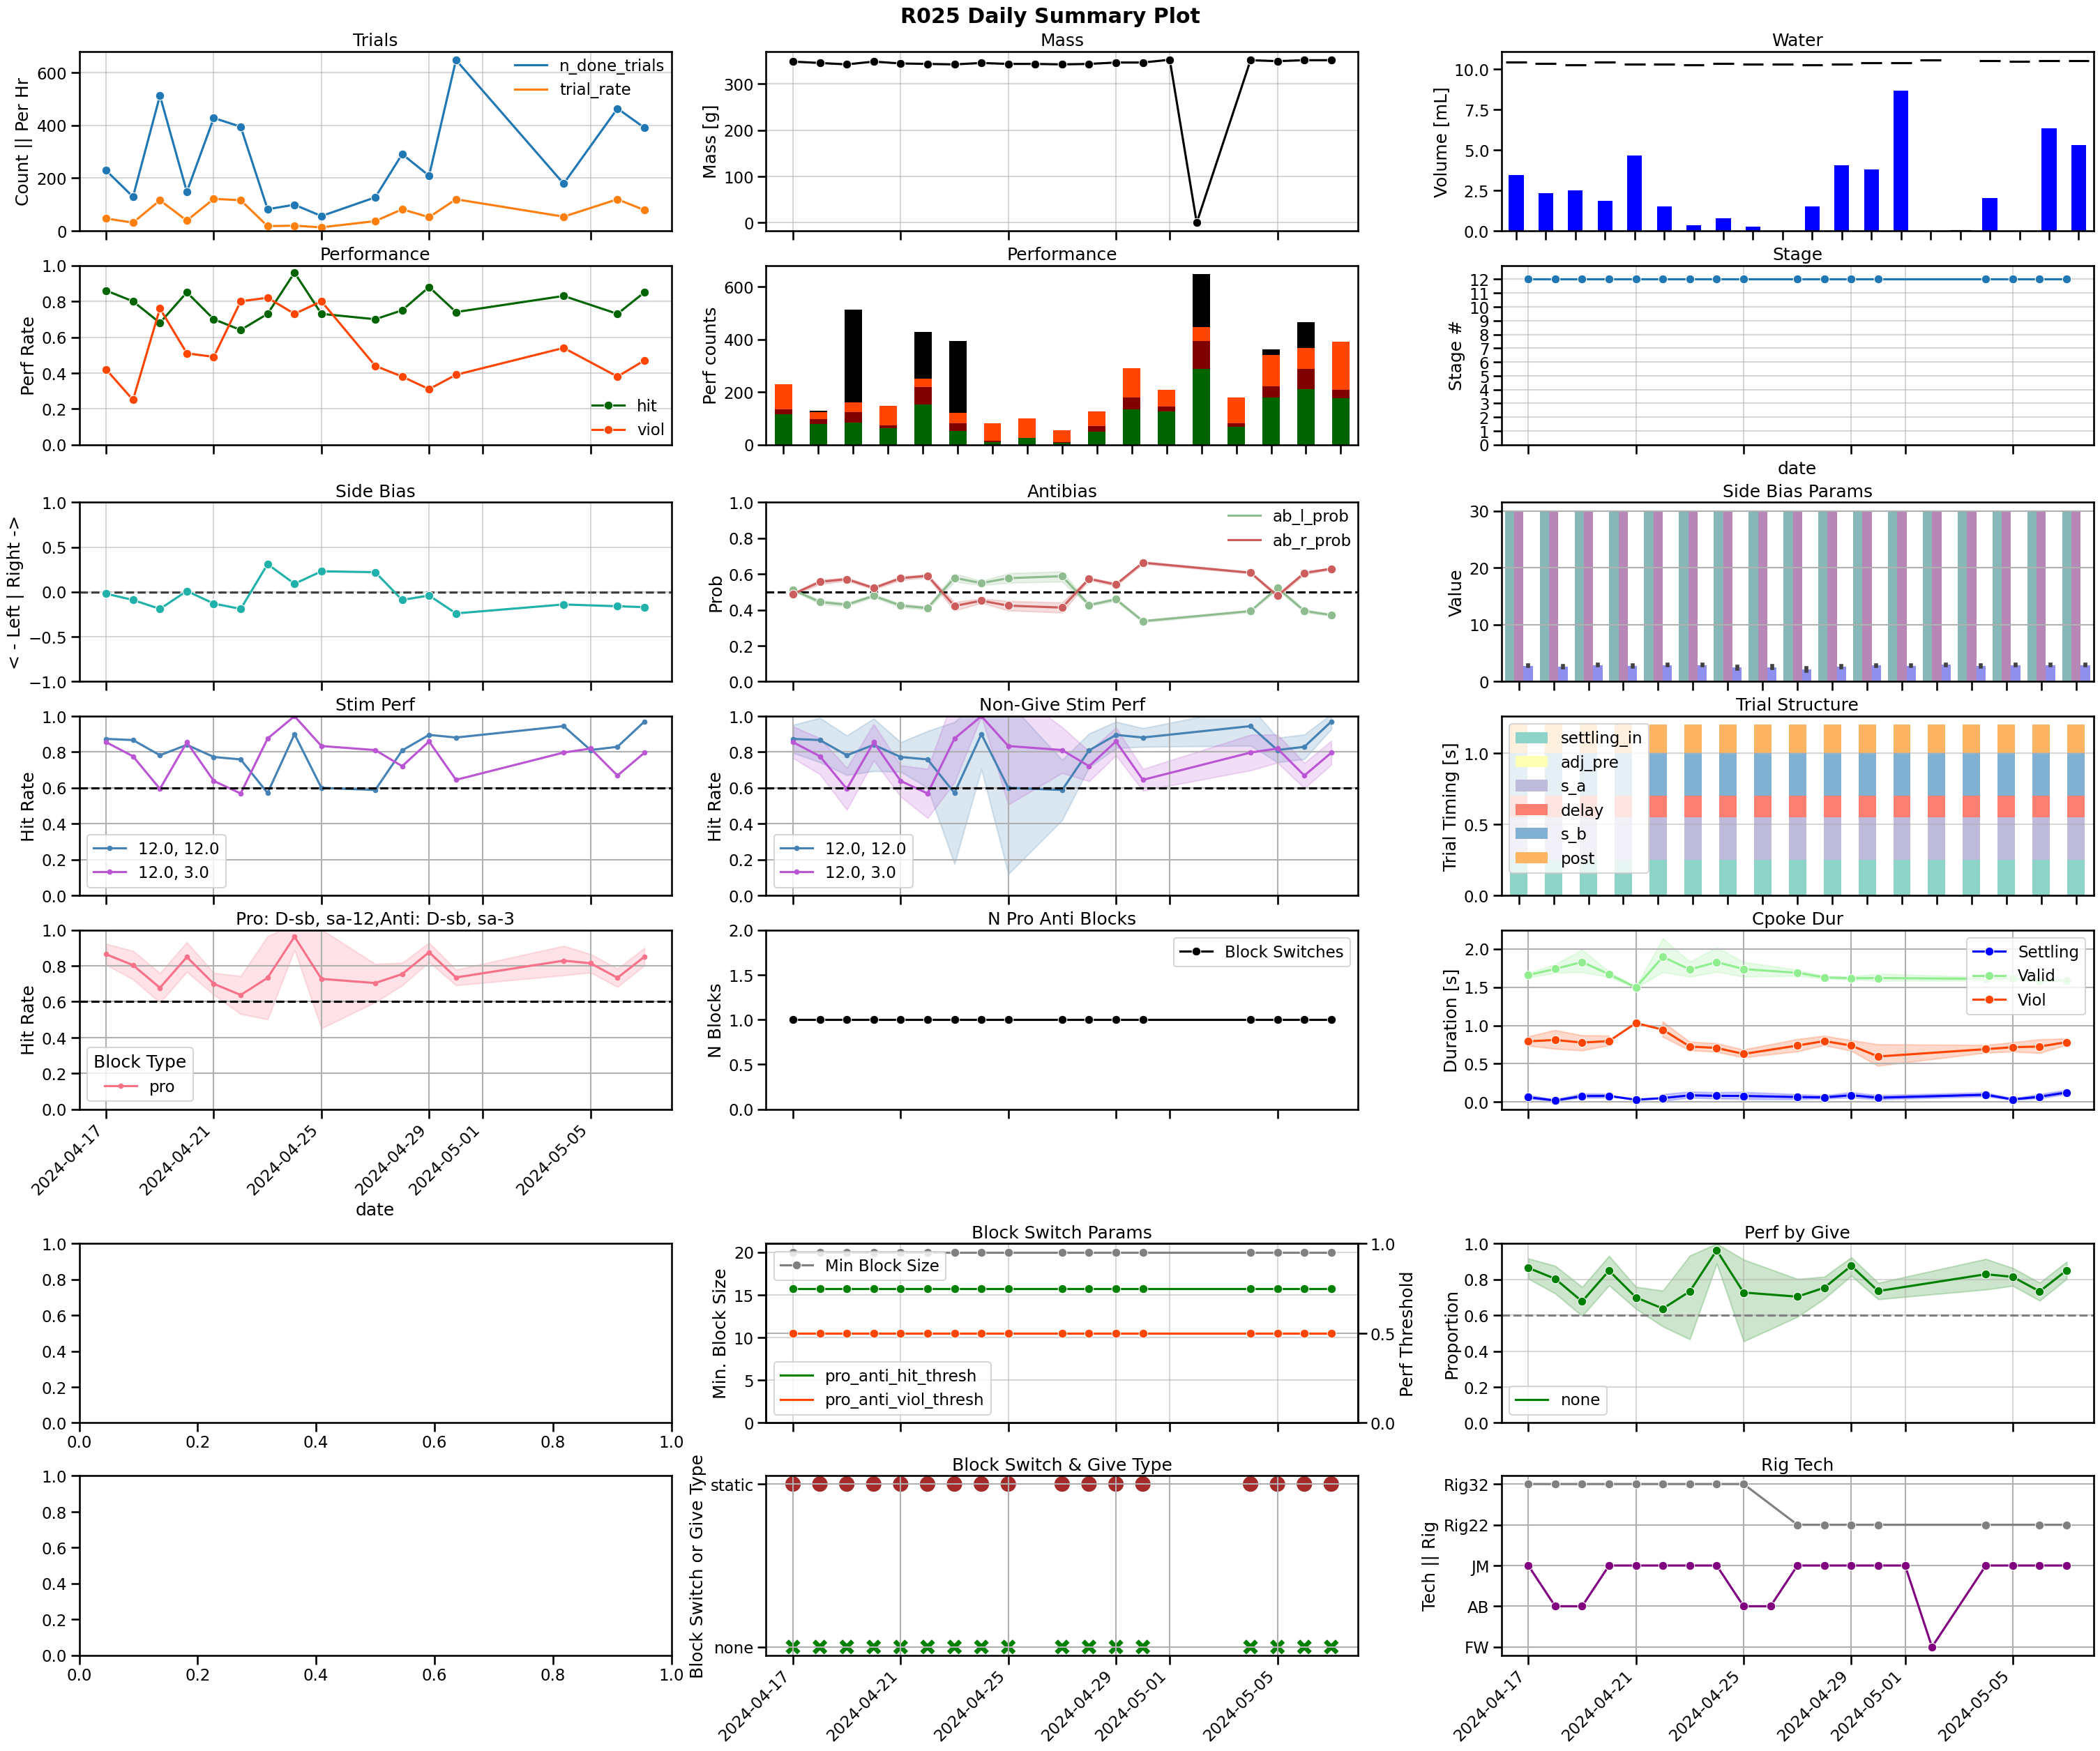

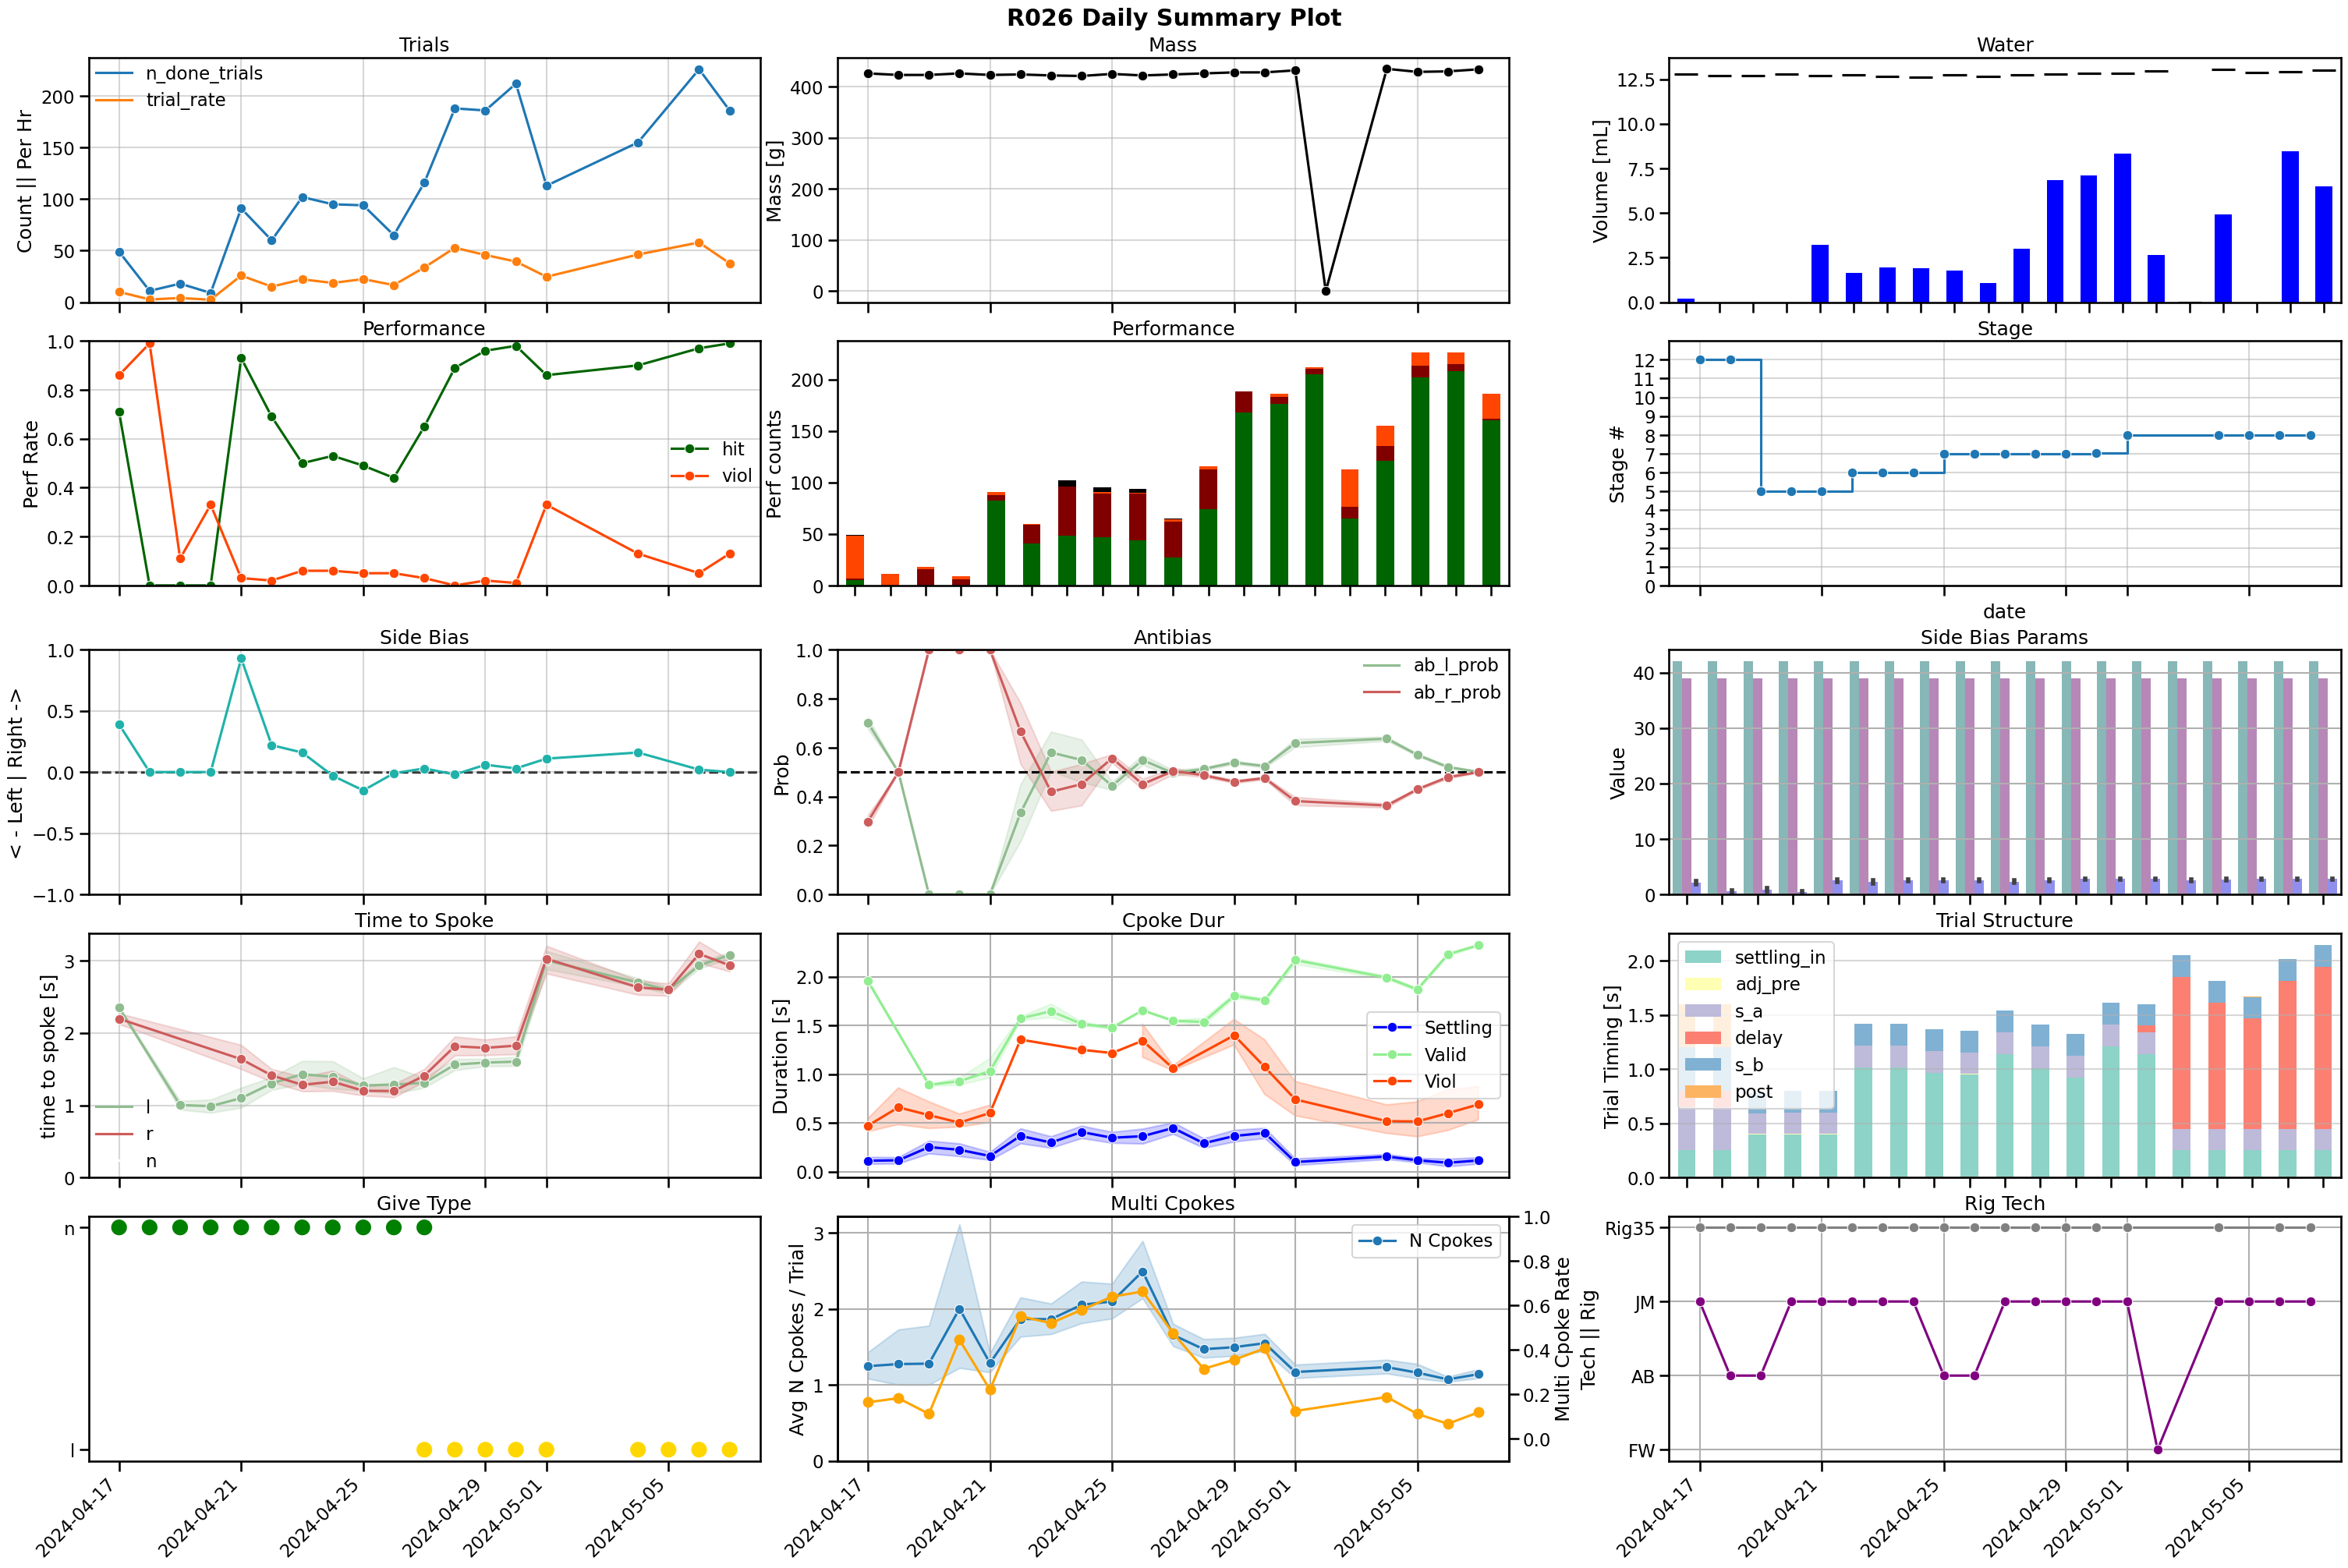

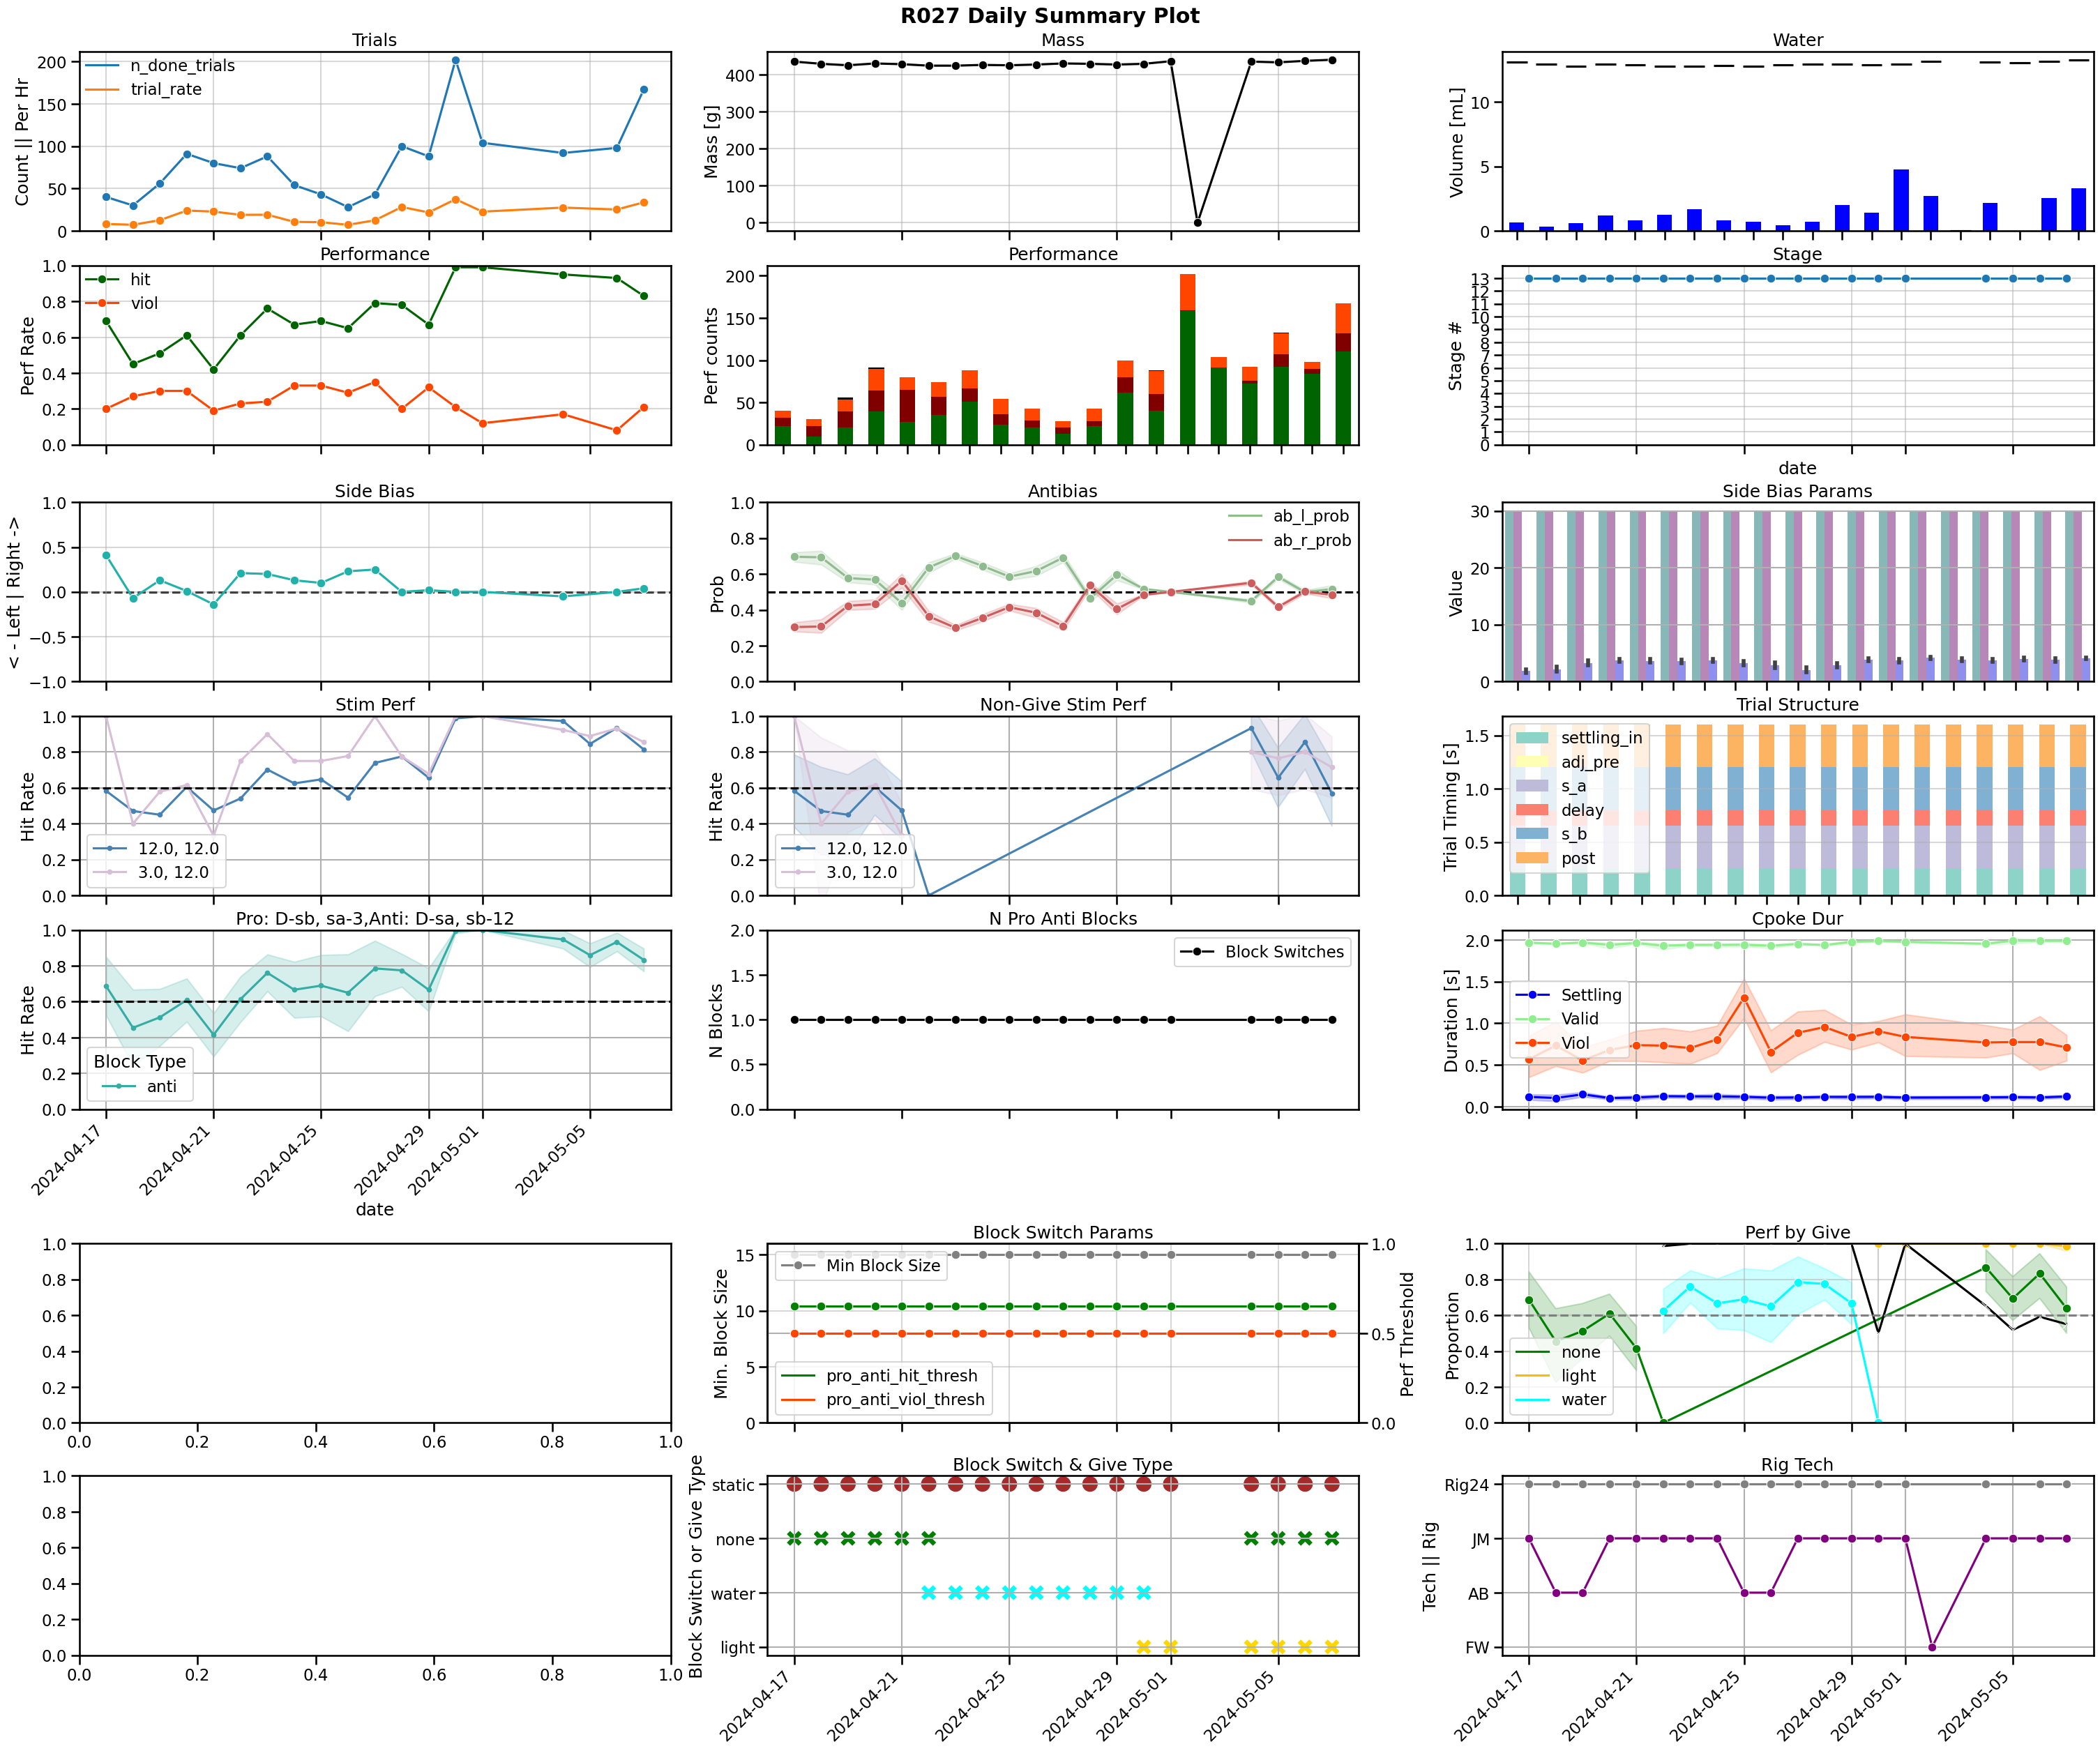

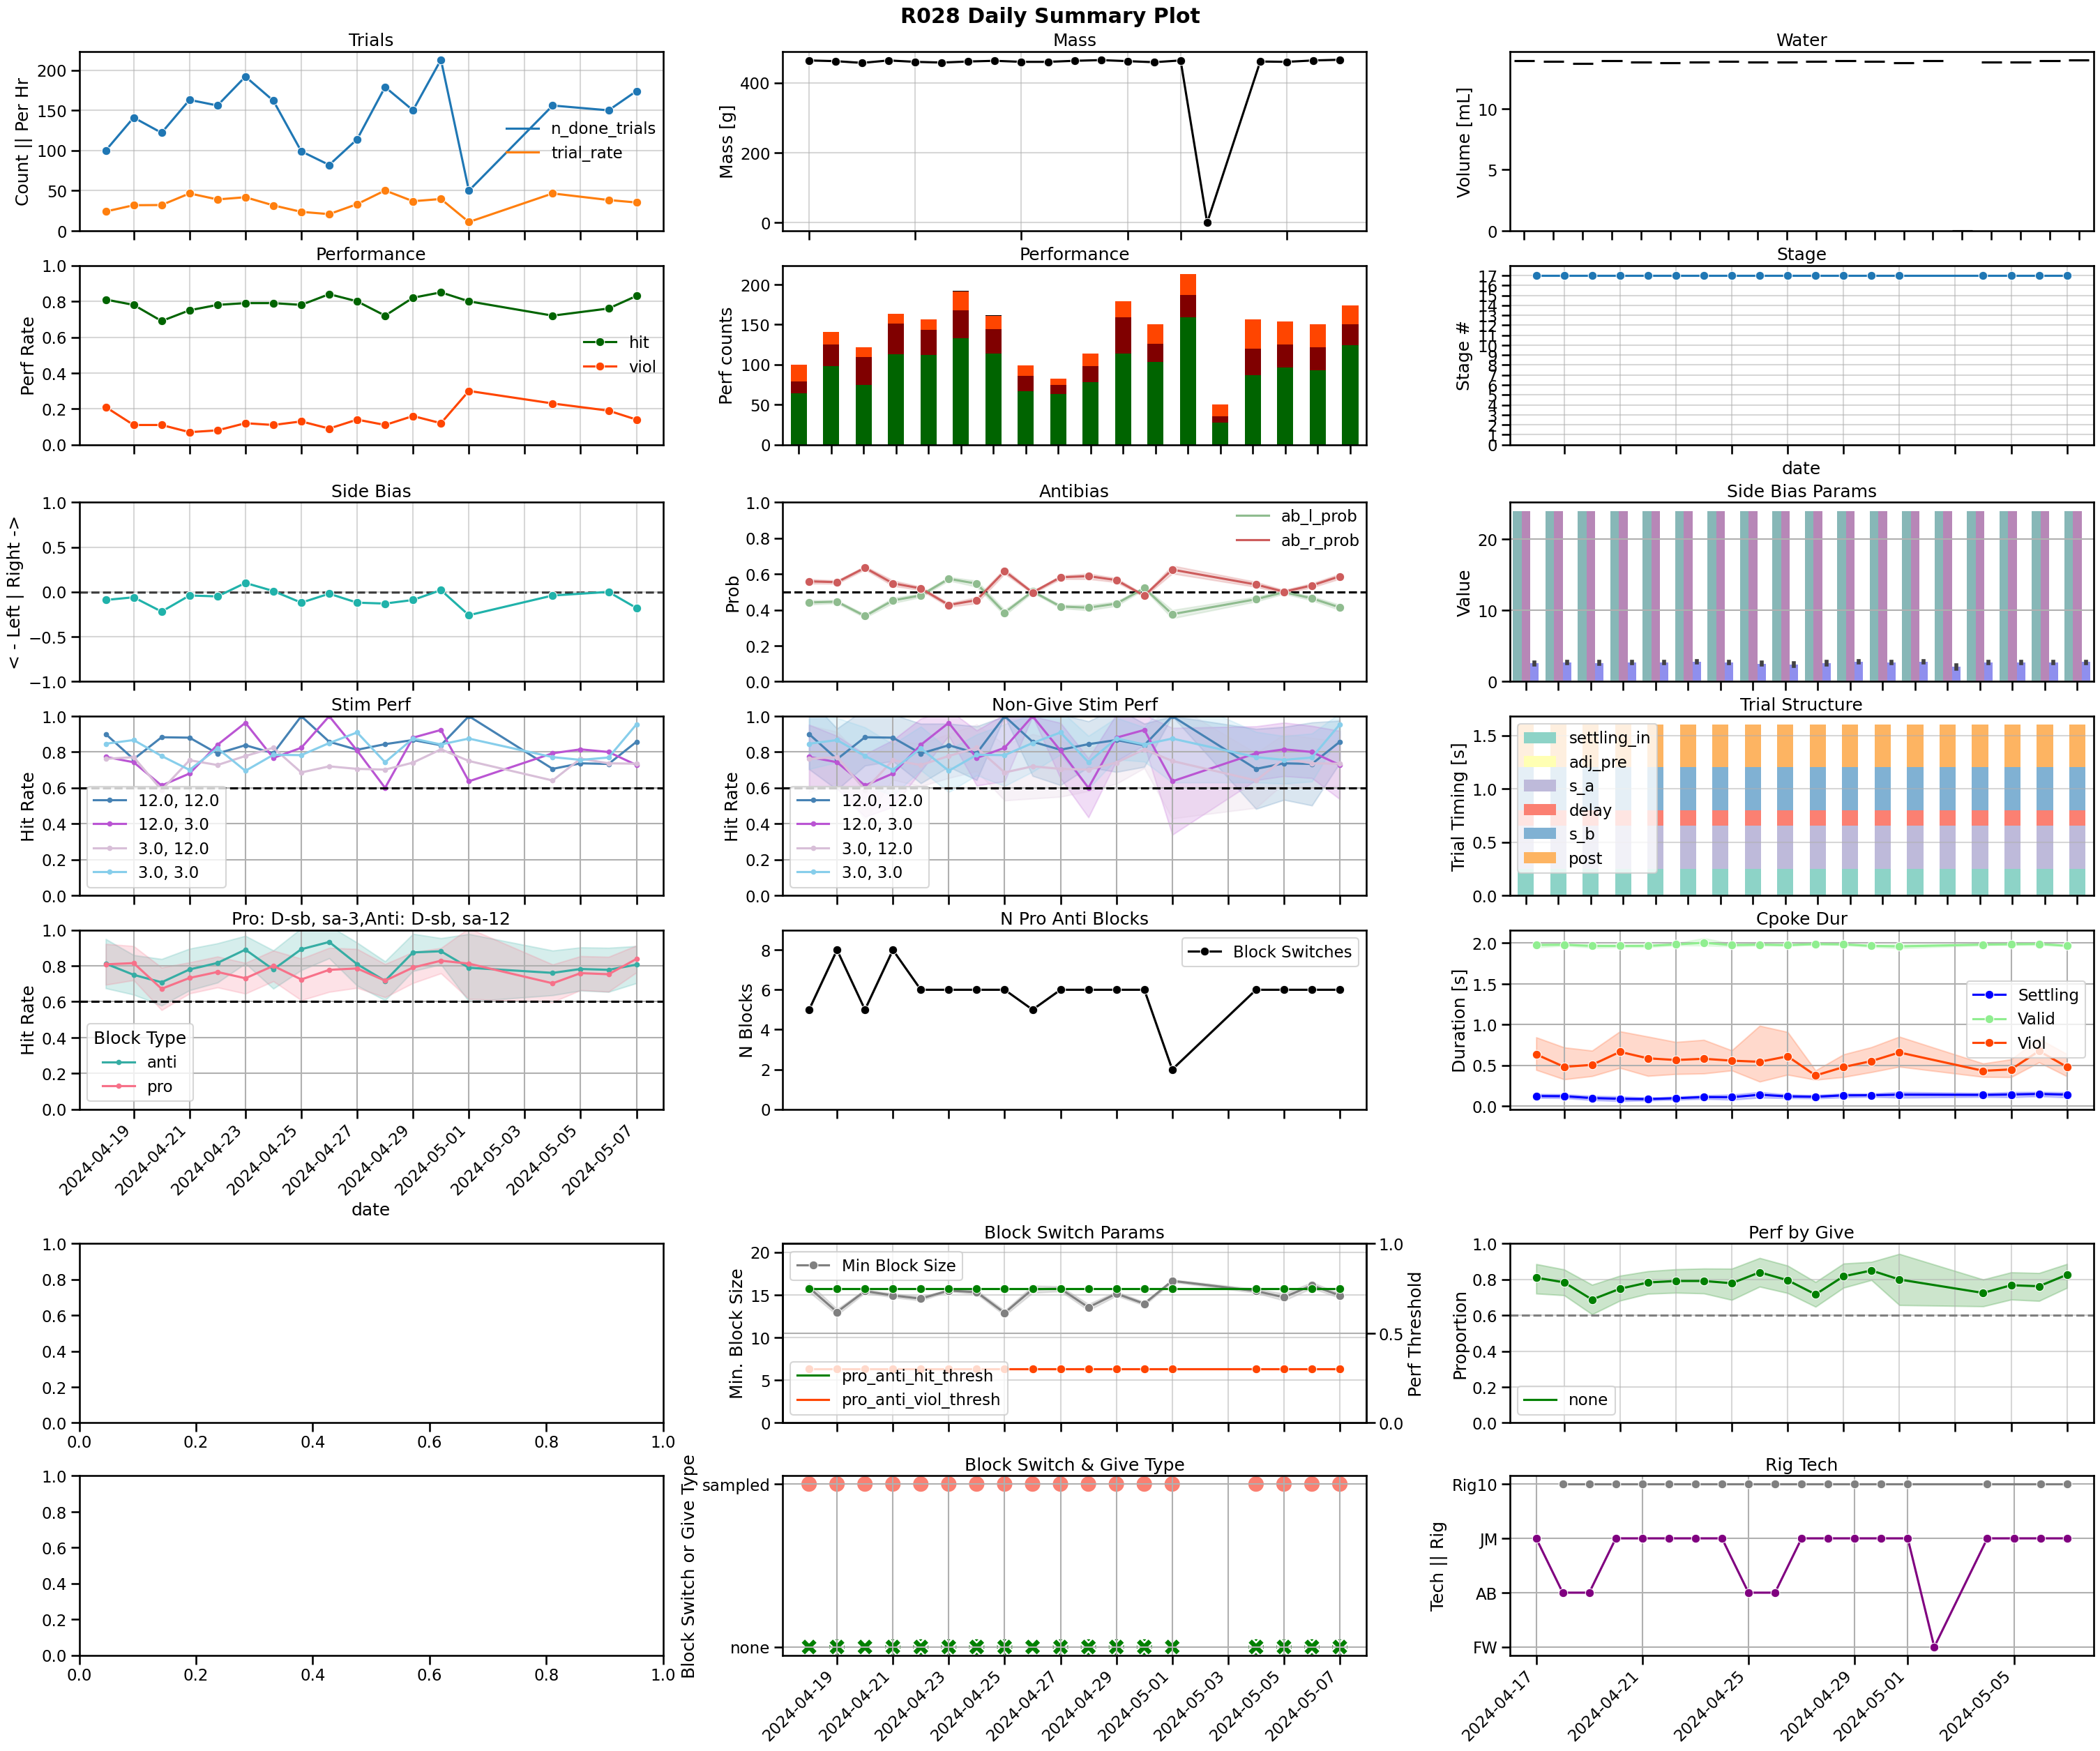

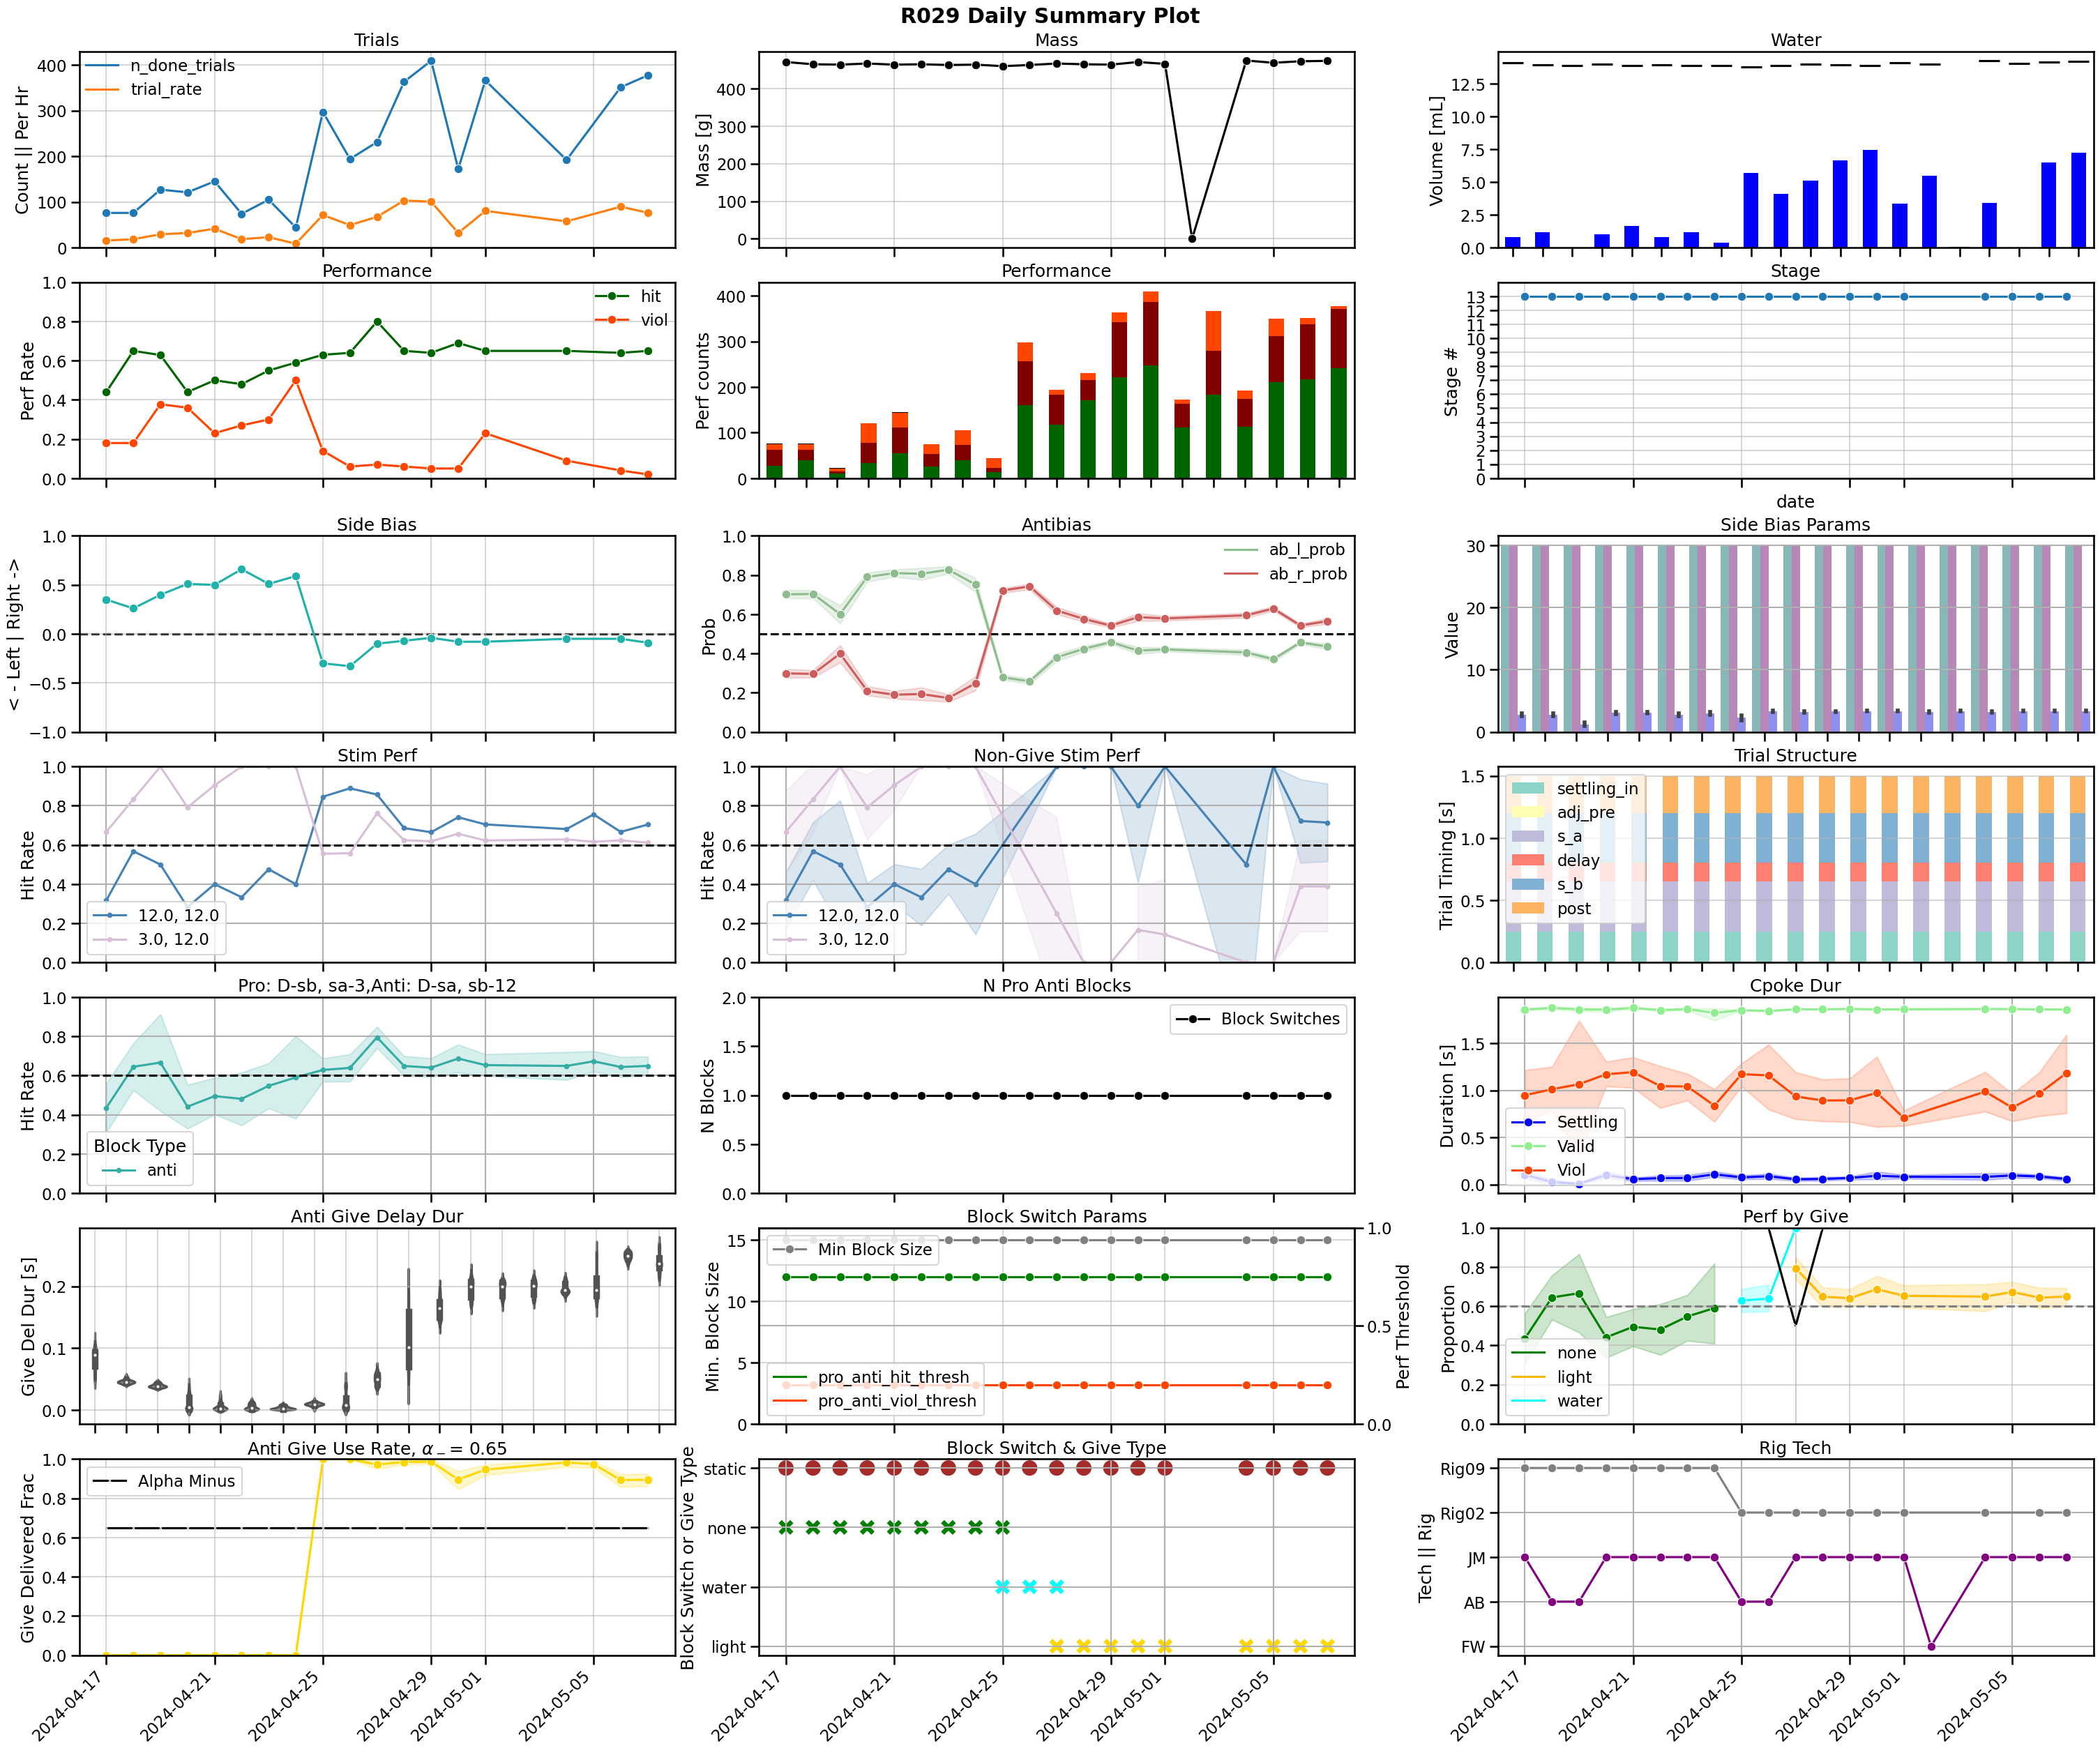

In [71]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [72]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R024_2024-05-05_day_summary
['s_a', 's_b', 'post', 'go']
skipping anti give del metrics
making R025_2024-05-05_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making R026_2024-05-05_day_summary
making R027_2024-05-05_day_summary
['s_a', 's_b', 'post']
making R028_2024-05-05_day_summary
['s_a', 's_b', 'go']
making R029_2024-05-05_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making R020_2024-05-06_day_summary
['s_a', 's_b', 'post']
skipping anti give del metrics
making R021_2024-05-06_day_summary
making R022_2024-05-06_day_summary
['s_a', 'delay', 's_b', 'go']
making R023_2024-05-06_day_summary
['s_a', 'delay', 'go']
skipping anti give del metrics
making R024_2024-05-06_day_summary
['s_a', 'delay', 's_b', 'go']
skipping anti give del metrics
making R025_2024-05-06_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
skipping anti give del metrics
making R026_2024-05-06_day_summary
making R027_2024-05-06_day_summary
['s_a', 's_b', 'post']
making R